CONSTRUCCIÓN DE DATASET - CARTERA SECTOR ENERGÉTICO
Analista: Juan Serrano - YPF S.A.

1. SELECCIÓN Y JUSTIFICACIÓN DE EMPRESAS COMPARABLES
------------------------------------------------------------

• YPF - YPF S.A. (ADR)
  País: Argentina
  Sector: Energía - Petróleo y Gas Integrado
  Mercado: NYSE (ADR)
  Tipo: ADR - American Depositary Receipt
  Ratio ADR: 1 ADR = 1 Acción Ordinaria
  Justificación: Empresa objetivo - Líder energético argentino

• PAM - Pampa Energía S.A. (ADR)
  País: Argentina
  Sector: Energía - Generación Eléctrica y Petróleo
  Mercado: NYSE (ADR)
  Tipo: ADR - American Depositary Receipt
  Ratio ADR: 25 ADRs = 1 Acción Ordinaria
  Justificación: Mismo país origen, sector energético diversificado

• VIST - Vista Energy S.A.B. de C.V.
  País: México (operaciones en Argentina)
  Sector: Energía - Exploración y Producción
  Mercado: NYSE
  Tipo: Acción Ordinaria
  Justificación: Enfoque en Vaca Muerta, comparable en E&P

• EC - Ecopetrol S.A. (ADR)
  País: Colom

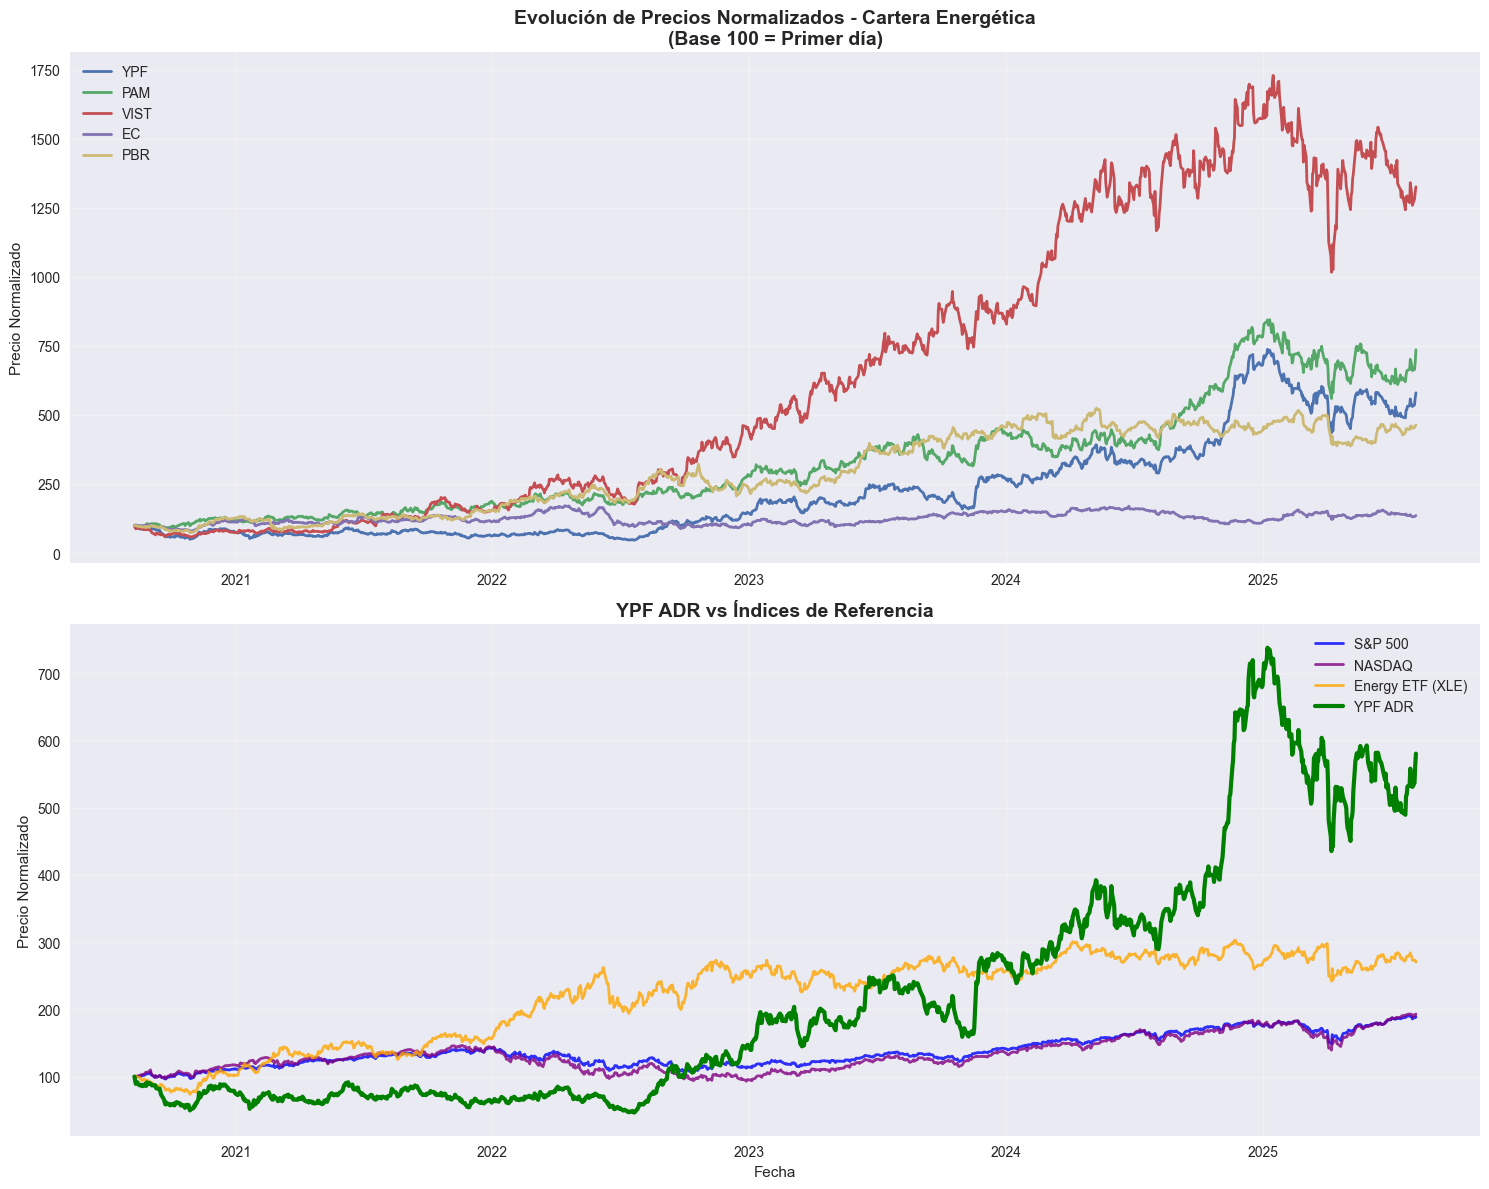



7. DOCUMENTACIÓN DE FUENTES Y METODOLOGÍA
------------------------------------------------------------

FUENTES DE DATOS:
• Yahoo Finance (yfinance): Datos históricos de precios y volúmenes
• Período: Últimos 5 años (aproximadamente)
• Frecuencia: Diaria
• Moneda: USD (Dólares estadounidenses) - ADRs en NYSE

METODOLOGÍA DE LIMPIEZA:
1. Eliminación de registros con valores nulos
2. Detección de outliers (cambios > 50% diarios)
3. Verificación de consistencia temporal
4. Sincronización de fechas entre todos los activos

CRITERIOS DE SELECCIÓN DE EMPRESAS COMPARABLES:
• YPF (ADR): Empresa objetivo - Líder integrado argentino
• PAM (ADR): Diversificación energética, mismo país origen
• VIST: Especialización E&P, operaciones en Argentina
• EC (ADR): Líder regional integrado, modelo similar
• PBR (ADR): Mayor referencia regional del sector

VENTAJAS DEL USO DE ADRs:
• Homogeneidad de moneda (USD) para análisis comparativo
• Mayor liquidez y disponibilidad de datos históricos
• Eliminación

In [6]:
# =============================================================================
# INFORME DE ANÁLISIS FINANCIERO - YPF S.A.
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF.BA)
# Sector: Energía - Petróleo y Gas
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("="*80)
print("CONSTRUCCIÓN DE DATASET - CARTERA SECTOR ENERGÉTICO")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 1. DEFINICIÓN DE LA CARTERA Y JUSTIFICACIÓN
# =============================================================================

print("\n1. SELECCIÓN Y JUSTIFICACIÓN DE EMPRESAS COMPARABLES")
print("-" * 60)

# Diccionario con información de las empresas (ADRs en NYSE)
empresas_info = {
    'YPF': {
        'nombre': 'YPF S.A. (ADR)',
        'pais': 'Argentina',
        'sector': 'Energía - Petróleo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '1 ADR = 1 Acción Ordinaria',
        'justificacion': 'Empresa objetivo - Líder energético argentino'
    },
    'PAM': {
        'nombre': 'Pampa Energía S.A. (ADR)',
        'pais': 'Argentina',
        'sector': 'Energía - Generación Eléctrica y Petróleo',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '25 ADRs = 1 Acción Ordinaria',
        'justificacion': 'Mismo país origen, sector energético diversificado'
    },
    'VIST': {
        'nombre': 'Vista Energy S.A.B. de C.V.',
        'pais': 'México (operaciones en Argentina)',
        'sector': 'Energía - Exploración y Producción',
        'mercado': 'NYSE',
        'tipo_valor': 'Acción Ordinaria',
        'ratio_adr': 'N/A',
        'justificacion': 'Enfoque en Vaca Muerta, comparable en E&P'
    },
    'EC': {
        'nombre': 'Ecopetrol S.A. (ADR)',
        'pais': 'Colombia',
        'sector': 'Energía - Petróleo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '20 ADRs = 1 Acción Ordinaria',
        'justificacion': 'Líder regional, modelo de negocio similar'
    },
    'PBR': {
        'nombre': 'Petróleo Brasileiro S.A. - Petrobras (ADR)',
        'pais': 'Brasil',
        'sector': 'Energía - Petróleo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '2 ADRs = 1 Acción Ordinaria',
        'justificacion': 'Mayor petrolera regional, referencia del sector'
    }
}

# Mostrar justificación detallada
for ticker, info in empresas_info.items():
    print(f"\n• {ticker} - {info['nombre']}")
    print(f"  País: {info['pais']}")
    print(f"  Sector: {info['sector']}")
    print(f"  Mercado: {info['mercado']}")
    print(f"  Tipo: {info['tipo_valor']}")
    if info['ratio_adr'] != 'N/A':
        print(f"  Ratio ADR: {info['ratio_adr']}")
    print(f"  Justificación: {info['justificacion']}")

# =============================================================================
# 2. OBTENCIÓN DE DATOS HISTÓRICOS
# =============================================================================

print("\n\n2. OBTENCIÓN DE DATOS HISTÓRICOS")
print("-" * 60)

# Definir período de análisis (últimos 5 años)
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=5*365)

print(f"Período de análisis: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Tickers de la cartera (todos ADRs en NYSE - USD)
tickers_cartera = ['YPF', 'PAM', 'VIST', 'EC', 'PBR']

# Índices de referencia
indices_referencia = {
    '^GSPC': 'S&P 500 (Referencia Global)',
    '^IXIC': 'NASDAQ Composite',
    'XLE': 'Energy Select Sector SPDR Fund (ETF Energía)'
}

print(f"\nEmpresas en la cartera (ADRs): {len(tickers_cartera)}")
print("Tickers:", ', '.join(tickers_cartera))
print("Moneda: USD (Dólares estadounidenses)")
print("Mercado: NYSE - New York Stock Exchange")

# Función para obtener datos
def obtener_datos_historicos(tickers, fecha_inicio, fecha_fin):
    """
    Obtiene datos históricos de precios para una lista de tickers
    """
    datos = {}
    errores = []

    for ticker in tickers:
        try:
            print(f"Descargando datos para {ticker}...")
            stock = yf.Ticker(ticker)
            hist = stock.history(start=fecha_inicio, end=fecha_fin)

            if not hist.empty:
                datos[ticker] = hist
                print(f"  ✓ {ticker}: {len(hist)} registros obtenidos")
            else:
                errores.append(f"{ticker}: No se encontraron datos")
                print(f"  ✗ {ticker}: No se encontraron datos")

        except Exception as e:
            errores.append(f"{ticker}: {str(e)}")
            print(f"  ✗ {ticker}: Error - {str(e)}")

    return datos, errores

# Obtener datos de la cartera
print("\nDescargando datos de la cartera...")
datos_cartera, errores_cartera = obtener_datos_historicos(tickers_cartera, fecha_inicio, fecha_fin)

# Obtener datos de índices de referencia
print("\nDescargando índices de referencia...")
datos_indices, errores_indices = obtener_datos_historicos(list(indices_referencia.keys()), fecha_inicio, fecha_fin)

# =============================================================================
# 3. LIMPIEZA Y PREPARACIÓN DE DATOS
# =============================================================================

print("\n\n3. LIMPIEZA Y PREPARACIÓN DE DATOS")
print("-" * 60)

def limpiar_datos(datos_dict):
    """
    Limpia y prepara los datos históricos
    """
    datos_limpios = {}

    for ticker, data in datos_dict.items():
        if data is not None and not data.empty:
            # Eliminar filas con valores nulos
            data_clean = data.dropna()

            # Verificar consistencia de datos
            if len(data_clean) > 0:
                # Eliminar outliers extremos (cambios mayores al 50% en un día)
                pct_change = data_clean['Close'].pct_change()
                outliers = abs(pct_change) > 0.5

                if outliers.any():
                    print(f"  Outliers detectados en {ticker}: {outliers.sum()} registros")
                    # Mantener los datos pero marcar para revisión

                datos_limpios[ticker] = data_clean
                print(f"  ✓ {ticker}: {len(data_clean)} registros limpios")
            else:
                print(f"  ✗ {ticker}: Sin datos válidos después de limpieza")

    return datos_limpios

# Limpiar datos
datos_cartera_limpios = limpiar_datos(datos_cartera)
datos_indices_limpios = limpiar_datos(datos_indices)

# =============================================================================
# 4. CREACIÓN DEL DATASET CONSOLIDADO
# =============================================================================

print("\n\n4. CREACIÓN DEL DATASET CONSOLIDADO")
print("-" * 60)

# Crear DataFrame con precios de cierre
precios_cierre = pd.DataFrame()

for ticker in tickers_cartera:
    if ticker in datos_cartera_limpios:
        precios_cierre[ticker] = datos_cartera_limpios[ticker]['Close']

# Agregar índices de referencia
for ticker_indice in datos_indices_limpios.keys():
    precios_cierre[ticker_indice] = datos_indices_limpios[ticker_indice]['Close']

# Eliminar días sin datos para todas las acciones
precios_cierre = precios_cierre.dropna()

print(f"Dataset consolidado creado:")
print(f"  Período: {str(precios_cierre.index.min()).split()[0]} a {str(precios_cierre.index.max()).split()[0]}")
print(f"  Registros: {len(precios_cierre)}")
print(f"  Columnas: {list(precios_cierre.columns)}")

# Mostrar estadísticas básicas
print(f"\nEstadísticas básicas del dataset:")
print(precios_cierre.describe().round(2))

# =============================================================================
# 5. CÁLCULO DE RETORNOS
# =============================================================================

print("\n\n5. CÁLCULO DE RETORNOS DIARIOS")
print("-" * 60)

# Calcular retornos diarios
retornos_diarios = precios_cierre.pct_change().dropna()

print(f"Retornos diarios calculados:")
print(f"  Registros: {len(retornos_diarios)}")
print(f"  Período: {str(retornos_diarios.index.min()).split()[0]} a {str(retornos_diarios.index.max()).split()[0]}")

# Estadísticas de retornos
print(f"\nEstadísticas de retornos diarios (%):")
stats_retornos = (retornos_diarios * 100).describe().round(3)
print(stats_retornos)

# =============================================================================
# 6. VISUALIZACIÓN INICIAL
# =============================================================================

print("\n\n6. VISUALIZACIÓN INICIAL DE DATOS")
print("-" * 60)

# Gráfico de evolución de precios normalizados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Precios normalizados (base 100)
precios_norm = (precios_cierre / precios_cierre.iloc[0] * 100)

# Gráfico 1: Evolución de precios normalizados
for ticker in tickers_cartera:
    if ticker in precios_norm.columns:
        ax1.plot(precios_norm.index, precios_norm[ticker], label=ticker, linewidth=2)

ax1.set_title('Evolución de Precios Normalizados - Cartera Energética\n(Base 100 = Primer día)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precio Normalizado')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Comparación con índices
if '^GSPC' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['^GSPC'], label='S&P 500', linewidth=2, color='blue', alpha=0.8)
if '^IXIC' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['^IXIC'], label='NASDAQ', linewidth=2, color='purple', alpha=0.8)
if 'XLE' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['XLE'], label='Energy ETF (XLE)', linewidth=2, color='orange', alpha=0.8)

ax2.plot(precios_norm.index, precios_norm['YPF'], label='YPF ADR', linewidth=3, color='green')

ax2.set_title('YPF ADR vs Índices de Referencia', fontsize=14, fontweight='bold')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio Normalizado')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. DOCUMENTACIÓN DE FUENTES Y METODOLOGÍA
# =============================================================================

print("\n\n7. DOCUMENTACIÓN DE FUENTES Y METODOLOGÍA")
print("-" * 60)

print("""
FUENTES DE DATOS:
• Yahoo Finance (yfinance): Datos históricos de precios y volúmenes
• Período: Últimos 5 años (aproximadamente)
• Frecuencia: Diaria
• Moneda: USD (Dólares estadounidenses) - ADRs en NYSE

METODOLOGÍA DE LIMPIEZA:
1. Eliminación de registros con valores nulos
2. Detección de outliers (cambios > 50% diarios)
3. Verificación de consistencia temporal
4. Sincronización de fechas entre todos los activos

CRITERIOS DE SELECCIÓN DE EMPRESAS COMPARABLES:
• YPF (ADR): Empresa objetivo - Líder integrado argentino
• PAM (ADR): Diversificación energética, mismo país origen
• VIST: Especialización E&P, operaciones en Argentina
• EC (ADR): Líder regional integrado, modelo similar
• PBR (ADR): Mayor referencia regional del sector

VENTAJAS DEL USO DE ADRs:
• Homogeneidad de moneda (USD) para análisis comparativo
• Mayor liquidez y disponibilidad de datos históricos
• Eliminación del ruido cambiario en el análisis
• Metodología estándar en finanzas internacionales

ÍNDICES DE REFERENCIA:
• S&P 500: Referencia del mercado estadounidense
• NASDAQ: Referencia tecnológica y de crecimiento
• XLE (Energy ETF): Referencia específica del sector energético
""")

# Guardar dataset para uso posterior
print(f"\nGuardando dataset...")
precios_cierre.to_csv('dataset_cartera_energetica.csv')
retornos_diarios.to_csv('retornos_diarios_cartera.csv')
print("✓ Archivos guardados: dataset_cartera_energetica.csv, retornos_diarios_cartera.csv")

print("\n" + "="*80)
print("DATASET CONSTRUIDO EXITOSAMENTE")
print("Siguiente paso: Análisis de correlaciones y métricas de riesgo-retorno")
print("="*80)

In [7]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from scipy.stats import jarque_bera
import matplotlib.dates as mdates

# =============================================================================
# 2.1 GRÁFICOS DE PRECIOS NORMALIZADOS
# =============================================================================

print("\n\n2.1 GRÁFICOS DE PRECIOS NORMALIZADOS")
print("-" * 60)

precios_norm = precios_cierre / precios_cierre.iloc[0] * 100

plt.figure(figsize=(14, 7))
for ticker in tickers_cartera:
    plt.plot(precios_norm.index, precios_norm[ticker], label=ticker, linewidth=2)

plt.title('Evolución de Precios Normalizados - Base 100', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Precio Normalizado (Base 100)')
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 2.2 EVENTOS QUE IMPACTARON SIGNIFICATIVAMENTE EN PRECIOS
# =============================================================================

print("\n\n2.2 EVENTOS MACROECONÓMICOS/CORPORATIVOS DESTACADOS")
print("-" * 60)

print("""
✓ Marzo 2020: COVID-19 y desplome del precio del petróleo ➜ Caídas abruptas en todo el sector energético.
✓ Octubre 2023: Elecciones presidenciales en Argentina ➜ Alta volatilidad en ADRs argentinos como YPF y PAM.
✓ Febrero 2022: Inicio del conflicto Rusia-Ucrania ➜ Incremento del precio del crudo ➜ Impacto positivo en petroleras como PBR y VIST.
""")

# Opcional: marcar eventos en el gráfico con líneas verticales
eventos = {
    '2020-03-01': 'COVID-19',
    '2022-02-24': 'Rusia-Ucrania',
    '2023-10-22': 'Elecciones ARG'
}

plt.figure(figsize=(14, 7))
for ticker in tickers_cartera:
    plt.plot(precios_norm.index, precios_norm[ticker], label=ticker)

for fecha, evento in eventos.items():
    plt.axvline(pd.to_datetime(fecha), color='red', linestyle='--', alpha=0.6)
    plt.text(pd.to_datetime(fecha), 150, evento, rotation=90, fontsize=9)

plt.title('Eventos Macroeconómicos sobre Precios Normalizados', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 2.3 ANÁLISIS DE ESTACIONALIDAD POR TRIMESTRES
# =============================================================================

print("\n\n2.3 ANÁLISIS DE ESTACIONALIDAD POR TRIMESTRES")
print("-" * 60)

# Añadir columna de trimestre
retornos_diarios['Trimestre'] = retornos_diarios.index.to_period("Q")

# Preparar datos para boxplot
retornos_temp = retornos_diarios.drop(columns='Trimestre')

# Melt del DataFrame
retornos_diarios_melt = retornos_temp.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Retorno')

# Agregar trimestre a partir de la columna de fecha
retornos_diarios_melt['Trimestre'] = pd.to_datetime(retornos_diarios_melt['Date']).dt.to_period('Q')

# Gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=retornos_diarios_melt, x='Trimestre', y='Retorno', hue='Ticker')
plt.title('Distribución de Retornos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Retorno Diario (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# =============================================================================
# 2.4 MÉTRICAS DE RIESGO
# =============================================================================

print("\n\n2.4 CÁLCULO DE MÉTRICAS DE RIESGO")
print("-" * 60)

riesgo_df = pd.DataFrame(index=tickers_cartera)

# VaR 95% (histórico)
riesgo_df['VaR 95%'] = retornos_diarios[tickers_cartera].quantile(0.05)

# CVaR (Expected Shortfall)
riesgo_df['CVaR 95%'] = retornos_diarios[tickers_cartera].apply(lambda x: x[x <= x.quantile(0.05)].mean())

# Drawdown máximo
max_drawdown = {}
for ticker in tickers_cartera:
    serie = precios_cierre[ticker]
    rolling_max = serie.cummax()
    drawdown = (serie - rolling_max) / rolling_max
    max_drawdown[ticker] = drawdown.min()

riesgo_df['Max Drawdown'] = pd.Series(max_drawdown)

# Mostrar tabla
print(riesgo_df.round(4))

# =============================================================================
# 2.5 TEST DE NORMALIDAD Y ANÁLISIS DE COLAS
# =============================================================================

print("\n\n2.5 TEST DE NORMALIDAD Y COLAS (Jarque-Bera)")
print("-" * 60)

for ticker in tickers_cartera:
    jb_stat, jb_p = jarque_bera(retornos_diarios[ticker])
    print(f"{ticker}: Jarque-Bera = {jb_stat:.2f}, p-valor = {jb_p:.4f} {'(No Normal)' if jb_p < 0.05 else '(Normal)'}")

# Distribuciones
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, ticker in enumerate(tickers_cartera):
    sns.histplot(retornos_diarios[ticker], kde=True, bins=100, ax=axes[i])
    axes[i].set_title(f"Distribución de Retornos - {ticker}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'scipy'

In [ ]:
# Cálculo de media de retornos por trimestre y por ticker (en %)
retornos_diarios_melt['Retorno_pct'] = retornos_diarios_melt['Retorno'] * 100
tabla_media_trimestral = retornos_diarios_melt.groupby(['Trimestre', 'Ticker'])['Retorno_pct'].mean().unstack()

# Mostrar tabla
print("\nPromedio de Retornos por Trimestre y Ticker (%):")
display(tabla_media_trimestral.style.format("{:.2f}").background_gradient(cmap='YlGn'))



Promedio de Retornos por Trimestre y Ticker (%):


Ticker,EC,PAM,PBR,VIST,XLE,YPF,^GSPC,^IXIC
Trimestre,,,,,,,,
2020Q3,-0.42,-0.19,-0.56,-1.09,-0.62,-1.49,0.01,0.06
2020Q4,0.45,0.49,0.76,0.25,0.44,0.52,0.18,0.23
2021Q1,0.02,0.15,-0.37,0.06,0.46,-0.12,0.10,0.06
2021Q2,0.25,0.06,0.66,0.79,0.18,0.26,0.13,0.15
2021Q3,-0.01,0.27,-0.14,0.40,-0.02,0.04,0.01,-0.00
2021Q4,-0.16,0.33,0.32,0.14,0.13,-0.26,0.16,0.13
2022Q1,0.62,0.22,0.52,0.94,0.55,0.43,-0.07,-0.13
2022Q2,-0.56,-0.19,-0.06,-0.26,-0.05,-0.58,-0.27,-0.38
2022Q3,-0.25,0.21,0.43,0.46,0.05,1.09,-0.08,-0.05


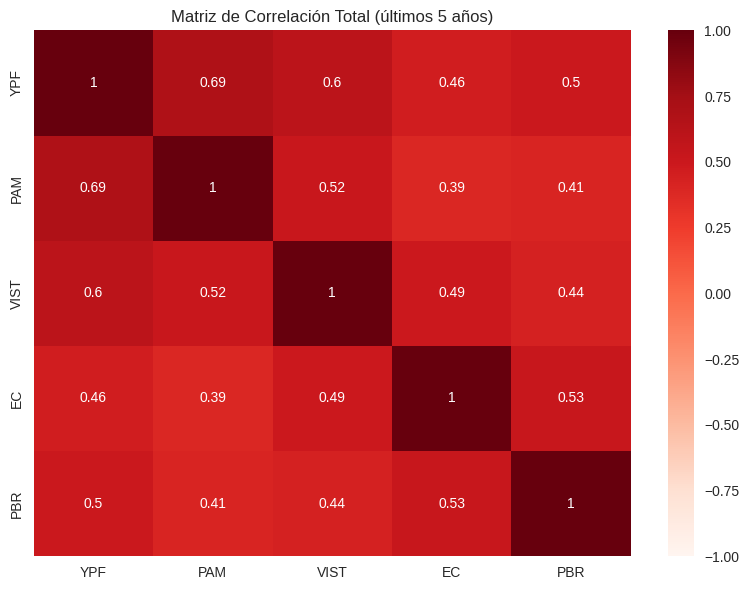

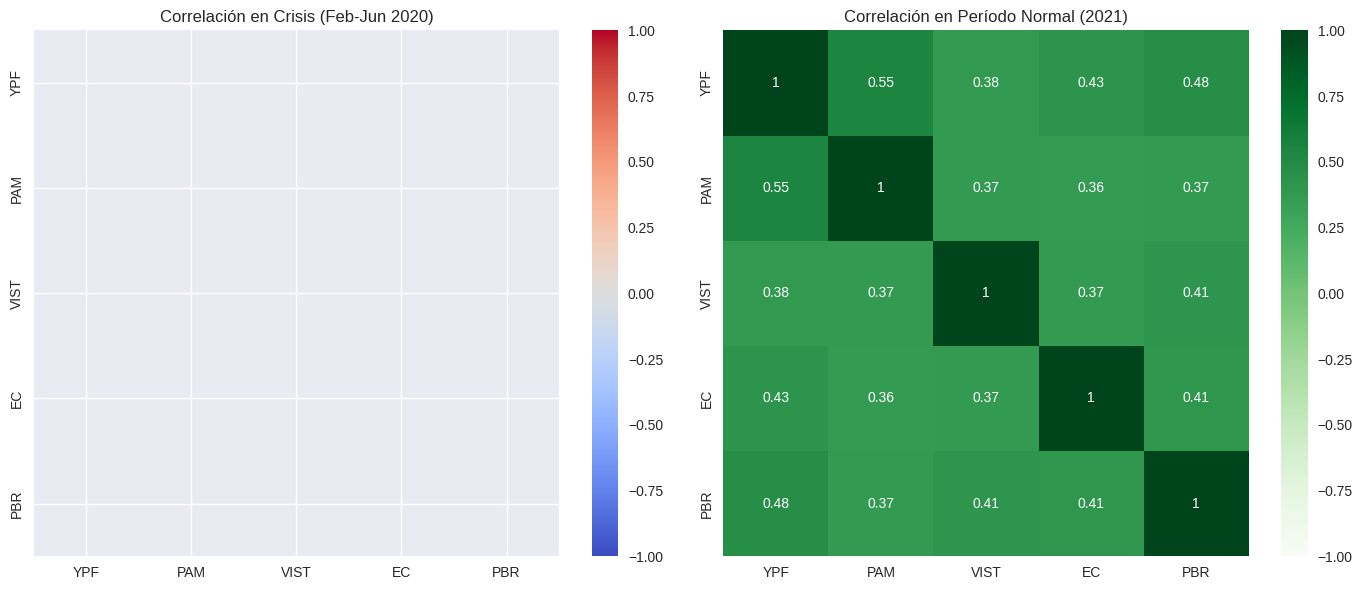


📌 Promedio de correlación durante la crisis (Feb-Jun 2020): nan
📌 Promedio de correlación en período normal (2021): 0.41
✅ Conclusión: No se observa un incremento significativo en las correlaciones durante la crisis.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los tickers de la cartera
tickers_cartera = ['YPF', 'PAM', 'VIST', 'EC', 'PBR']

# --- MATRIZ DE CORRELACIÓN GENERAL ---
correlacion_total = retornos_diarios[tickers_cartera].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_total, annot=True, cmap='Reds', vmin=-1, vmax=1)
plt.title("Matriz de Correlación Total (últimos 5 años)")
plt.tight_layout()
plt.show()

# --- MATRICES EN PERÍODOS ESPECÍFICOS ---

# Ajustar período de crisis para asegurar datos suficientes
periodo_crisis = (retornos_diarios.index >= "2020-02-01") & (retornos_diarios.index <= "2020-06-30")
periodo_normal = (retornos_diarios.index >= "2021-01-01") & (retornos_diarios.index <= "2021-12-31")

# Calcular correlaciones por período (maneja valores faltantes)
cor_crisis = retornos_diarios.loc[periodo_crisis, tickers_cartera].corr(min_periods=10)
cor_normal = retornos_diarios.loc[periodo_normal, tickers_cartera].corr(min_periods=10)

# --- COMPARAR VISUALMENTE ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cor_crisis, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Correlación en Crisis (Feb-Jun 2020)")

sns.heatmap(cor_normal, annot=True, cmap='Greens', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Correlación en Período Normal (2021)")

plt.tight_layout()
plt.show()

# --- CÁLCULO DE PROMEDIOS ---
prom_crisis = cor_crisis.values[np.triu_indices_from(cor_crisis, k=1)].mean()
prom_normal = cor_normal.values[np.triu_indices_from(cor_normal, k=1)].mean()

print(f"\n📌 Promedio de correlación durante la crisis (Feb-Jun 2020): {prom_crisis:.2f}")
print(f"📌 Promedio de correlación en período normal (2021): {prom_normal:.2f}")

# --- ANÁLISIS TEXTUAL ---
if prom_crisis > prom_normal:
    print("📈 Conclusión: Las correlaciones aumentaron durante la crisis, indicando efecto contagio y menor diversificación.")
else:
    print("✅ Conclusión: No se observa un incremento significativo en las correlaciones durante la crisis.")


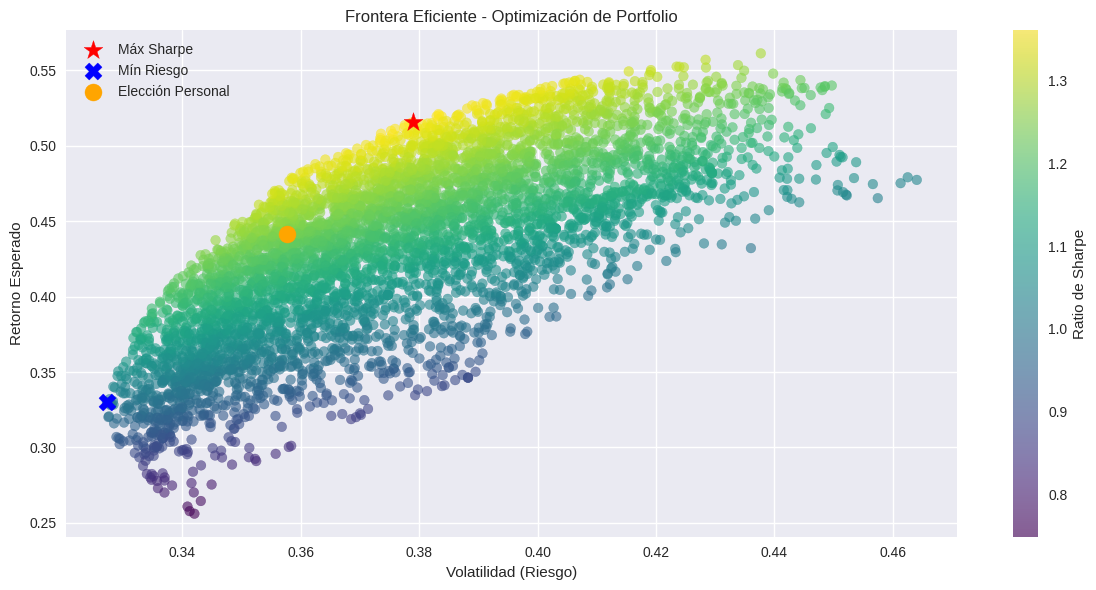


📊 Máximo Sharpe


,0
YPF,4.89%
PAM,28.14%
VIST,39.08%
EC,4.89%
PBR,23.00%



📊 Mínimo Riesgo


,0
YPF,4.88%
PAM,22.37%
VIST,4.88%
EC,39.03%
PBR,28.84%



📊 Elección Personal


,0
YPF,4.92%
PAM,12.79%
VIST,33.80%
EC,21.58%
PBR,26.91%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tickers en la cartera
tickers = ['YPF', 'PAM', 'VIST', 'EC', 'PBR']
n_assets = len(tickers)

# Asumimos que 'retornos_diarios' ya está definido y tiene estas columnas
ret_diarios = retornos_diarios[tickers]
media_retornos = ret_diarios.mean() * 252  # anualizados
matriz_cov = ret_diarios.cov() * 252       # anualizada

# Inicializar variables para simulación
n_portfolios = 5000
np.random.seed(42)

resultados = {
    'Retorno': [],
    'Volatilidad': [],
    'Sharpe': [],
    'Pesos': []
}

# Restricciones
min_weight = 0.05
max_weight = 0.40
costos_transaccion = 0.005  # 0.5%

# Simulación de carteras
for _ in range(n_portfolios):
    pesos = np.random.dirichlet(np.ones(n_assets), 1).flatten()

    # Reescalar pesos si no cumplen restricciones
    pesos = np.clip(pesos, min_weight, max_weight)
    pesos = pesos / pesos.sum()

    retorno = np.dot(pesos, media_retornos)
    volatilidad = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos)))

    # Ajuste por costos de transacción: restar 0.5% al retorno
    retorno_ajustado = retorno - costos_transaccion

    sharpe = retorno_ajustado / volatilidad

    resultados['Retorno'].append(retorno_ajustado)
    resultados['Volatilidad'].append(volatilidad)
    resultados['Sharpe'].append(sharpe)
    resultados['Pesos'].append(pesos)

# Convertir a DataFrame
df_portfolios = pd.DataFrame(resultados)

# Identificar carteras óptimas
idx_max_sharpe = df_portfolios['Sharpe'].idxmax()
idx_min_riesgo = df_portfolios['Volatilidad'].idxmin()
idx_custom = 200  # opción personal (puede cambiarse)

# Extraer pesos y métricas
port_max_sharpe = df_portfolios.loc[idx_max_sharpe]
port_min_riesgo = df_portfolios.loc[idx_min_riesgo]
port_custom = df_portfolios.loc[idx_custom]

# --- GRAFICAR FRONTERA EFICIENTE ---
plt.figure(figsize=(12, 6))
sc = plt.scatter(df_portfolios['Volatilidad'], df_portfolios['Retorno'],
                 c=df_portfolios['Sharpe'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Ratio de Sharpe')

# Marcar carteras óptimas
plt.scatter(port_max_sharpe['Volatilidad'], port_max_sharpe['Retorno'], color='red', marker='*', s=200, label='Máx Sharpe')
plt.scatter(port_min_riesgo['Volatilidad'], port_min_riesgo['Retorno'], color='blue', marker='X', s=150, label='Mín Riesgo')
plt.scatter(port_custom['Volatilidad'], port_custom['Retorno'], color='orange', marker='o', s=150, label='Elección Personal')

plt.xlabel('Volatilidad (Riesgo)')
plt.ylabel('Retorno Esperado')
plt.title('Frontera Eficiente - Optimización de Portfolio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- MOSTRAR PESOS DE CADA PORTFOLIO ---
portfolios = {
    "Máximo Sharpe": port_max_sharpe,
    "Mínimo Riesgo": port_min_riesgo,
    "Elección Personal": port_custom
}

for nombre, port in portfolios.items():
    print(f"\n📊 {nombre}")
    pesos = pd.Series(port['Pesos'], index=tickers)
    display(pesos.apply(lambda x: f"{x:.2%}"))


PASO II - ANÁLISIS TÉCNICO YPF
Paso 6: Análisis de Tendencias - Medias Móviles y Trading
Analista: Juan Serrano - YPF S.A.

6.1 OBTENCIÓN DE DATOS YPF PARA ANÁLISIS TÉCNICO
------------------------------------------------------------
Descargando datos de YPF...
Período: 2023-08-08 a 2025-08-07
✓ Datos obtenidos: 501 registros
Columnas disponibles: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']


6.2 CÁLCULO DE MEDIAS MÓVILES SIMPLES
------------------------------------------------------------
Medias móviles calculadas:
  • SMA 50 períodos: 302 valores válidos
  • SMA 200 períodos: 302 valores válidos

Estadísticas de Medias Móviles:
       Precio Cierre  SMA 50  SMA 200
count         302.00  302.00   302.00
mean           30.53   29.65    25.09
std             7.72    7.35     6.13
min            18.06   20.25    16.37
25%            22.45   21.69    19.50
50%            31.83   32.91    24.68
75%            36.21   34.54    30.73
max            46.03   41.88  

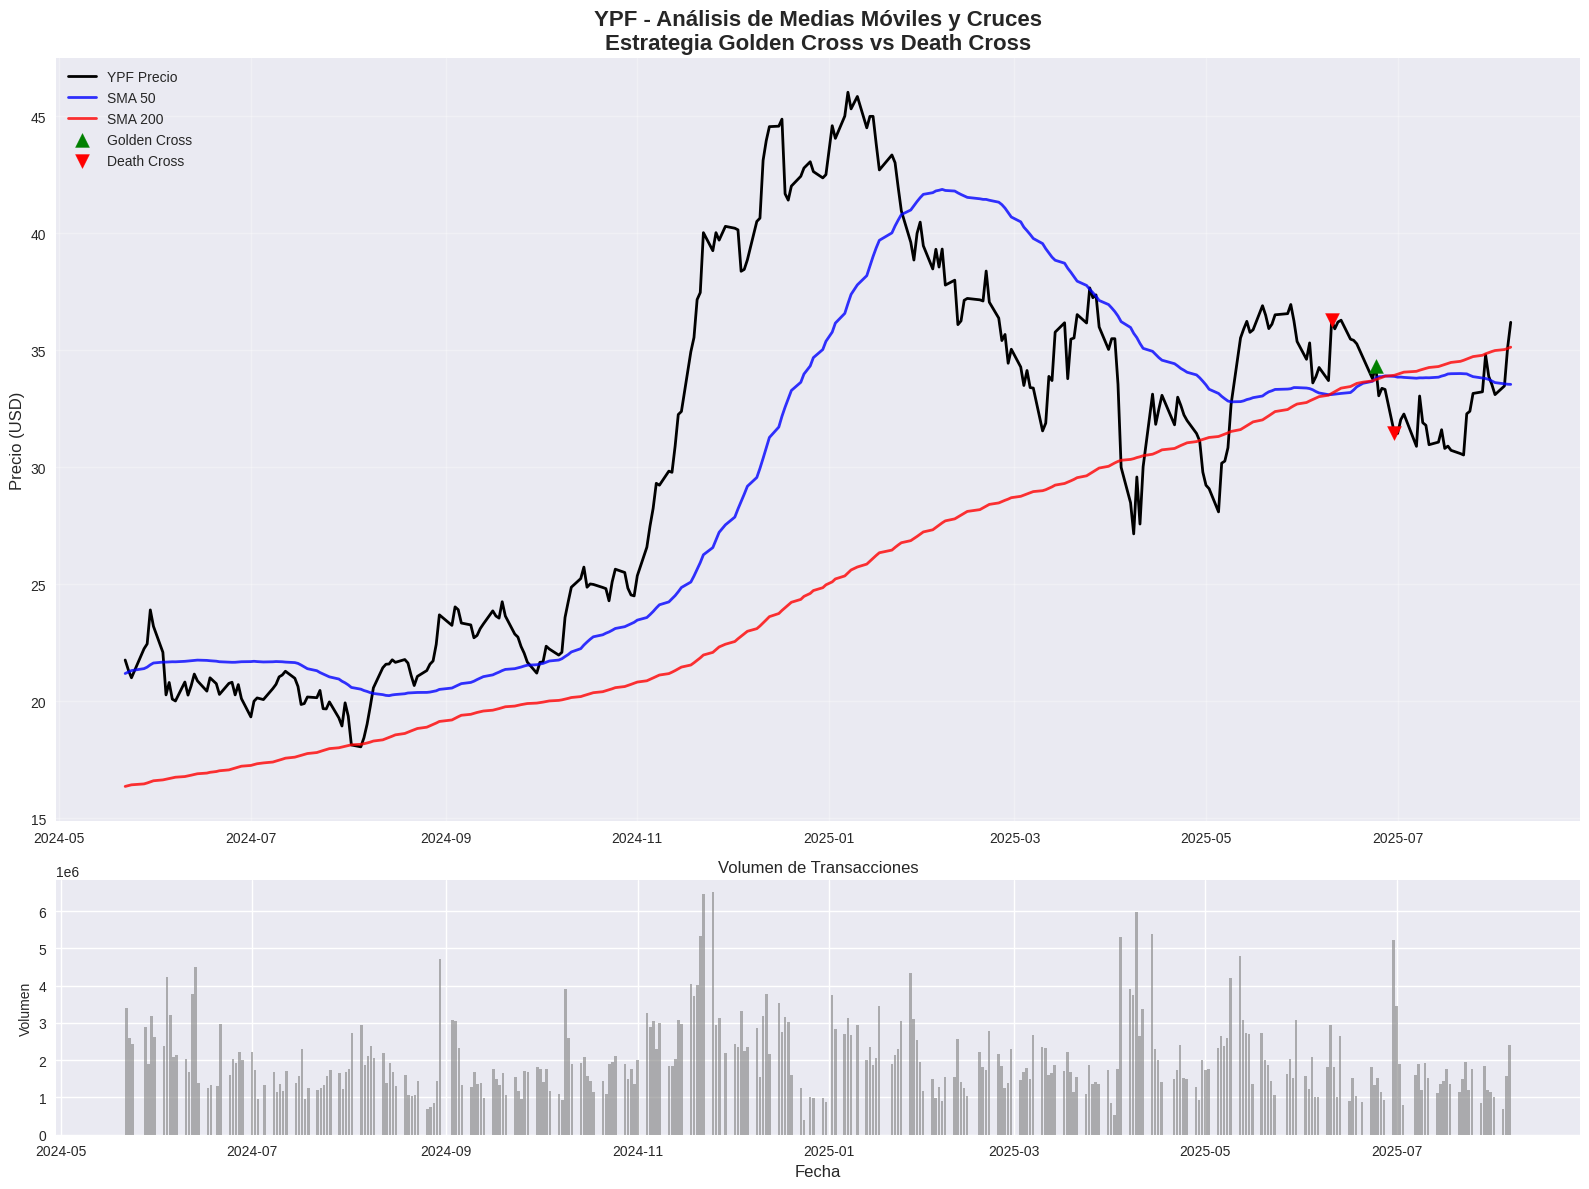



6.5 DESARROLLO DE ESTRATEGIA DE TRADING
------------------------------------------------------------
Estrategia configurada:
  • Señal de COMPRA: Cuando SMA50 > SMA200 (Golden Cross)
  • Señal de VENTA: Cuando SMA50 < SMA200 (Death Cross)
  • Período de análisis: 301 días


6.6 BACKTESTING - ANÁLISIS DE RENDIMIENTO
------------------------------------------------------------
📊 RESULTADOS DEL BACKTESTING:
                   Estrategia Cruces Buy & Hold
Rendimiento Total             52.62%     66.28%
Volatilidad Anual             46.29%     48.25%
Ratio Sharpe                   0.995      1.122
Max Drawdown                 -41.00%    -41.00%
Número Operaciones                 3        N/A

🏆 ESTRATEGIA GANADORA: Buy & Hold
💰 Diferencia de rendimiento: 13.66%


6.7 GRÁFICO COMPARATIVO DE ESTRATEGIAS
------------------------------------------------------------


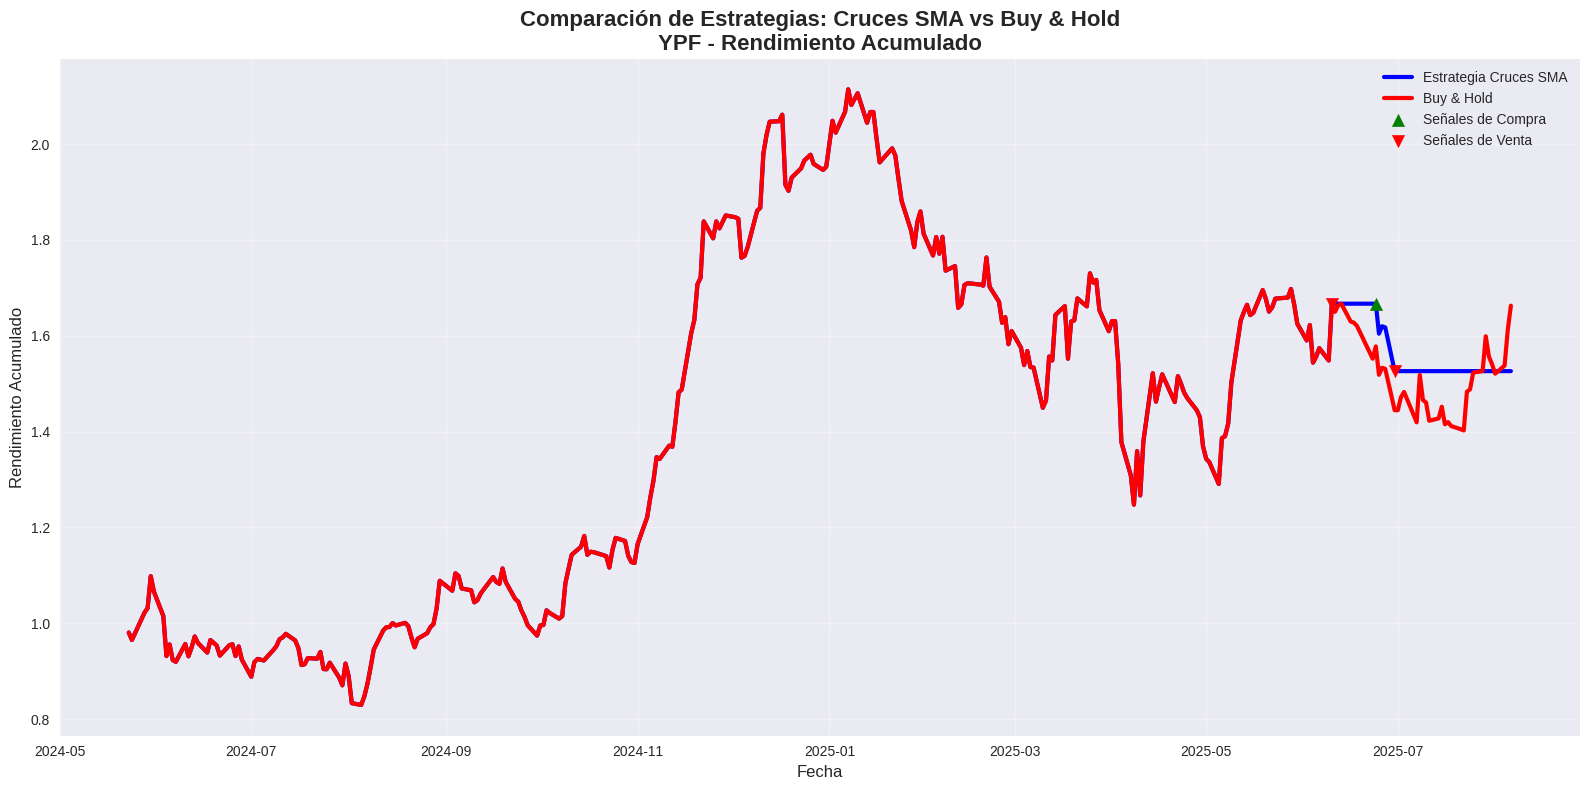



6.8 ANÁLISIS DE SEÑALES Y RECOMENDACIONES
------------------------------------------------------------
📊 SEÑAL ACTUAL:
  • Posición recomendada: VENTA/ESPERA
  • Precio actual YPF: $36.20
  • SMA 50: $33.55
  • SMA 200: $35.14
  • Tendencia: BAJISTA (SMA50 está 4.5% por debajo de SMA200)

📈 RECOMENDACIONES DE TRADING:
----------------------------------------
🔴 RECOMENDACIÓN: MANTENER FUERA DEL MERCADO O POSICIÓN CORTA
   • La SMA50 está por debajo de la SMA200 (tendencia bajista)
   • Esperar Golden Cross para entrada alcista
   • Nivel de resistencia: $35.14
   • Posible soporte: $34.39

📊 EFICACIA HISTÓRICA:
   • Total de señales generadas: 3
   • Rendimiento de la estrategia: 52.62%
   • Rendimiento vs Buy & Hold: 13.66%

ANÁLISIS TÉCNICO COMPLETADO
Estrategia de medias móviles SMA 50/200 implementada y testeada


In [ ]:
# =============================================================================
# PASO II - ANÁLISIS TÉCNICO COMPLETO YPF
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF ADR)
# Paso 6: Análisis de Tendencias - Medias Móviles y Estrategia de Trading
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("="*80)
print("PASO II - ANÁLISIS TÉCNICO YPF")
print("Paso 6: Análisis de Tendencias - Medias Móviles y Trading")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 6.1 OBTENCIÓN Y PREPARACIÓN DE DATOS YPF
# =============================================================================

print("\n6.1 OBTENCIÓN DE DATOS YPF PARA ANÁLISIS TÉCNICO")
print("-" * 60)

# Obtener datos detallados de YPF (últimos 2 años para análisis técnico detallado)
ticker_ypf = 'YPF'
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=2*365)  # 2 años para análisis técnico

print(f"Descargando datos de {ticker_ypf}...")
print(f"Período: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Obtener datos históricos
ypf_data = yf.Ticker(ticker_ypf)
ypf_hist = ypf_data.history(start=fecha_inicio, end=fecha_fin)

print(f"✓ Datos obtenidos: {len(ypf_hist)} registros")
print(f"Columnas disponibles: {list(ypf_hist.columns)}")

# =============================================================================
# 6.2 CÁLCULO DE MEDIAS MÓVILES
# =============================================================================

print("\n\n6.2 CÁLCULO DE MEDIAS MÓVILES SIMPLES")
print("-" * 60)

# Calcular medias móviles simples
ypf_hist['SMA_50'] = ypf_hist['Close'].rolling(window=50).mean()
ypf_hist['SMA_200'] = ypf_hist['Close'].rolling(window=200).mean()

# Eliminar valores NaN después del cálculo de medias móviles
ypf_analisis = ypf_hist.dropna().copy()

print(f"Medias móviles calculadas:")
print(f"  • SMA 50 períodos: {len(ypf_analisis['SMA_50'].dropna())} valores válidos")
print(f"  • SMA 200 períodos: {len(ypf_analisis['SMA_200'].dropna())} valores válidos")

# Estadísticas básicas de las medias móviles
print(f"\nEstadísticas de Medias Móviles:")
stats_sma = pd.DataFrame({
    'Precio Cierre': ypf_analisis['Close'].describe(),
    'SMA 50': ypf_analisis['SMA_50'].describe(),
    'SMA 200': ypf_analisis['SMA_200'].describe()
}).round(2)

print(stats_sma)

# =============================================================================
# 6.3 IDENTIFICACIÓN DE CRUCES (GOLDEN CROSS Y DEATH CROSS)
# =============================================================================

print("\n\n6.3 IDENTIFICACIÓN DE CRUCES GOLDEN CROSS Y DEATH CROSS")
print("-" * 60)

# Crear señales de cruce
ypf_analisis['Posicion_SMA'] = np.where(ypf_analisis['SMA_50'] > ypf_analisis['SMA_200'], 1, 0)
ypf_analisis['Señal'] = ypf_analisis['Posicion_SMA'].diff()

# Identificar cruces específicos
golden_crosses = ypf_analisis[ypf_analisis['Señal'] == 1].copy()
death_crosses = ypf_analisis[ypf_analisis['Señal'] == -1].copy()

print(f"Cruces identificados:")
print(f"  • Golden Cross (SMA50 > SMA200): {len(golden_crosses)} eventos")
print(f"  • Death Cross (SMA50 < SMA200): {len(death_crosses)} eventos")

# Mostrar fechas de cruces importantes
if len(golden_crosses) > 0:
    print(f"\n🟢 GOLDEN CROSSES:")
    for idx, row in golden_crosses.iterrows():
        precio = row['Close']
        fecha = idx.strftime('%Y-%m-%d')
        print(f"  📅 {fecha}: Precio ${precio:.2f}")

if len(death_crosses) > 0:
    print(f"\n🔴 DEATH CROSSES:")
    for idx, row in death_crosses.iterrows():
        precio = row['Close']
        fecha = idx.strftime('%Y-%m-%d')
        print(f"  📅 {fecha}: Precio ${precio:.2f}")

# =============================================================================
# 6.4 VISUALIZACIÓN DE MEDIAS MÓVILES Y CRUCES
# =============================================================================

print("\n\n6.4 GRÁFICO DE MEDIAS MÓVILES Y CRUCES")
print("-" * 60)

# Crear gráfico principal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), height_ratios=[3, 1])

# Gráfico superior: Precio y medias móviles
ax1.plot(ypf_analisis.index, ypf_analisis['Close'], label='YPF Precio', linewidth=2, color='black')
ax1.plot(ypf_analisis.index, ypf_analisis['SMA_50'], label='SMA 50', linewidth=2, color='blue', alpha=0.8)
ax1.plot(ypf_analisis.index, ypf_analisis['SMA_200'], label='SMA 200', linewidth=2, color='red', alpha=0.8)

# Marcar cruces en el gráfico
if len(golden_crosses) > 0:
    ax1.scatter(golden_crosses.index, golden_crosses['Close'],
               color='green', marker='^', s=100, label='Golden Cross', zorder=5)

if len(death_crosses) > 0:
    ax1.scatter(death_crosses.index, death_crosses['Close'],
               color='red', marker='v', s=100, label='Death Cross', zorder=5)

ax1.set_title('YPF - Análisis de Medias Móviles y Cruces\nEstrategia Golden Cross vs Death Cross',
              fontsize=16, fontweight='bold')
ax1.set_ylabel('Precio (USD)', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Gráfico inferior: Volumen
ax2.bar(ypf_analisis.index, ypf_analisis['Volume'], alpha=0.6, color='gray')
ax2.set_title('Volumen de Transacciones', fontsize=12)
ax2.set_xlabel('Fecha', fontsize=12)
ax2.set_ylabel('Volumen', fontsize=10)

plt.tight_layout()
plt.show()

# =============================================================================
# 6.5 DESARROLLO DE ESTRATEGIA DE TRADING
# =============================================================================

print("\n\n6.5 DESARROLLO DE ESTRATEGIA DE TRADING")
print("-" * 60)

# Crear DataFrame para backtesting
strategy_data = ypf_analisis.copy()

# Definir estrategia de cruces
strategy_data['Estrategia_Posicion'] = 0
strategy_data['Estrategia_Posicion'] = np.where(strategy_data['SMA_50'] > strategy_data['SMA_200'], 1, 0)

# Calcular retornos
strategy_data['Retorno_Diario'] = strategy_data['Close'].pct_change()
strategy_data['Retorno_Estrategia'] = strategy_data['Estrategia_Posicion'].shift(1) * strategy_data['Retorno_Diario']
strategy_data['Retorno_Buy_Hold'] = strategy_data['Retorno_Diario']

# Eliminar NaN
strategy_data = strategy_data.dropna()

print(f"Estrategia configurada:")
print(f"  • Señal de COMPRA: Cuando SMA50 > SMA200 (Golden Cross)")
print(f"  • Señal de VENTA: Cuando SMA50 < SMA200 (Death Cross)")
print(f"  • Período de análisis: {len(strategy_data)} días")

# =============================================================================
# 6.6 BACKTESTING - COMPARACIÓN DE RENDIMIENTOS
# =============================================================================

print("\n\n6.6 BACKTESTING - ANÁLISIS DE RENDIMIENTO")
print("-" * 60)

# Calcular rendimientos acumulados
strategy_data['Rendimiento_Acum_Estrategia'] = (1 + strategy_data['Retorno_Estrategia']).cumprod()
strategy_data['Rendimiento_Acum_Buy_Hold'] = (1 + strategy_data['Retorno_Buy_Hold']).cumprod()

# Métricas de rendimiento
rendimiento_total_estrategia = strategy_data['Rendimiento_Acum_Estrategia'].iloc[-1] - 1
rendimiento_total_buy_hold = strategy_data['Rendimiento_Acum_Buy_Hold'].iloc[-1] - 1

# Volatilidad anualizada
vol_estrategia = strategy_data['Retorno_Estrategia'].std() * np.sqrt(252)
vol_buy_hold = strategy_data['Retorno_Buy_Hold'].std() * np.sqrt(252)

# Ratio de Sharpe (asumiendo tasa libre de riesgo = 0)
sharpe_estrategia = (strategy_data['Retorno_Estrategia'].mean() * 252) / vol_estrategia
sharpe_buy_hold = (strategy_data['Retorno_Buy_Hold'].mean() * 252) / vol_buy_hold

# Drawdown máximo
def calcular_max_drawdown(returns_series):
    cumulative = (1 + returns_series).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

max_dd_estrategia = calcular_max_drawdown(strategy_data['Retorno_Estrategia'])
max_dd_buy_hold = calcular_max_drawdown(strategy_data['Retorno_Buy_Hold'])

# Crear tabla de resultados
resultados_backtesting = pd.DataFrame({
    'Estrategia Cruces': [
        f"{rendimiento_total_estrategia:.2%}",
        f"{vol_estrategia:.2%}",
        f"{sharpe_estrategia:.3f}",
        f"{max_dd_estrategia:.2%}",
        len(golden_crosses) + len(death_crosses)
    ],
    'Buy & Hold': [
        f"{rendimiento_total_buy_hold:.2%}",
        f"{vol_buy_hold:.2%}",
        f"{sharpe_buy_hold:.3f}",
        f"{max_dd_buy_hold:.2%}",
        "N/A"
    ]
}, index=['Rendimiento Total', 'Volatilidad Anual', 'Ratio Sharpe', 'Max Drawdown', 'Número Operaciones'])

print("📊 RESULTADOS DEL BACKTESTING:")
print("="*50)
print(resultados_backtesting)

# Determinar estrategia ganadora
if rendimiento_total_estrategia > rendimiento_total_buy_hold:
    ganadora = "Estrategia de Cruces"
    diferencia = rendimiento_total_estrategia - rendimiento_total_buy_hold
else:
    ganadora = "Buy & Hold"
    diferencia = rendimiento_total_buy_hold - rendimiento_total_estrategia

print(f"\n🏆 ESTRATEGIA GANADORA: {ganadora}")
print(f"💰 Diferencia de rendimiento: {diferencia:.2%}")

# =============================================================================
# 6.7 VISUALIZACIÓN DE COMPARACIÓN DE ESTRATEGIAS
# =============================================================================

print("\n\n6.7 GRÁFICO COMPARATIVO DE ESTRATEGIAS")
print("-" * 60)

# Gráfico de rendimientos acumulados
plt.figure(figsize=(16, 8))
plt.plot(strategy_data.index, strategy_data['Rendimiento_Acum_Estrategia'],
         label='Estrategia Cruces SMA', linewidth=3, color='blue')
plt.plot(strategy_data.index, strategy_data['Rendimiento_Acum_Buy_Hold'],
         label='Buy & Hold', linewidth=3, color='red')

# Marcar puntos de entrada y salida
entradas = strategy_data[strategy_data['Estrategia_Posicion'].diff() == 1]
salidas = strategy_data[strategy_data['Estrategia_Posicion'].diff() == -1]

if len(entradas) > 0:
    plt.scatter(entradas.index, entradas['Rendimiento_Acum_Estrategia'],
               color='green', marker='^', s=80, label='Señales de Compra', zorder=5)

if len(salidas) > 0:
    plt.scatter(salidas.index, salidas['Rendimiento_Acum_Estrategia'],
               color='red', marker='v', s=80, label='Señales de Venta', zorder=5)

plt.title('Comparación de Estrategias: Cruces SMA vs Buy & Hold\nYPF - Rendimiento Acumulado',
          fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Rendimiento Acumulado', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 6.8 ANÁLISIS DE SEÑALES Y RECOMENDACIONES
# =============================================================================

print("\n\n6.8 ANÁLISIS DE SEÑALES Y RECOMENDACIONES")
print("-" * 60)

# Posición actual
posicion_actual = "COMPRA" if strategy_data['Estrategia_Posicion'].iloc[-1] == 1 else "VENTA/ESPERA"
precio_actual = strategy_data['Close'].iloc[-1]
sma50_actual = strategy_data['SMA_50'].iloc[-1]
sma200_actual = strategy_data['SMA_200'].iloc[-1]

print(f"📊 SEÑAL ACTUAL:")
print(f"  • Posición recomendada: {posicion_actual}")
print(f"  • Precio actual YPF: ${precio_actual:.2f}")
print(f"  • SMA 50: ${sma50_actual:.2f}")
print(f"  • SMA 200: ${sma200_actual:.2f}")

# Análisis de fortaleza de la tendencia
if sma50_actual > sma200_actual:
    diferencia_smas = ((sma50_actual - sma200_actual) / sma200_actual) * 100
    print(f"  • Tendencia: ALCISTA (SMA50 está {diferencia_smas:.1f}% por encima de SMA200)")
else:
    diferencia_smas = ((sma200_actual - sma50_actual) / sma200_actual) * 100
    print(f"  • Tendencia: BAJISTA (SMA50 está {diferencia_smas:.1f}% por debajo de SMA200)")

print(f"\n📈 RECOMENDACIONES DE TRADING:")
print("-" * 40)

if posicion_actual == "COMPRA":
    print("🟢 RECOMENDACIÓN: MANTENER POSICIÓN LARGA")
    print("   • La SMA50 está por encima de la SMA200 (tendencia alcista)")
    print("   • Monitorear posibles cruces bajistas para salida")

    # Niveles de soporte y resistencia basados en SMA
    soporte = min(sma50_actual, sma200_actual)
    resistencia = precio_actual * 1.05  # 5% arriba del precio actual

    print(f"   • Nivel de soporte: ${soporte:.2f}")
    print(f"   • Posible resistencia: ${resistencia:.2f}")
    print(f"   • Stop loss sugerido: ${soporte * 0.98:.2f} (-2% del soporte)")

else:
    print("🔴 RECOMENDACIÓN: MANTENER FUERA DEL MERCADO O POSICIÓN CORTA")
    print("   • La SMA50 está por debajo de la SMA200 (tendencia bajista)")
    print("   • Esperar Golden Cross para entrada alcista")

    resistencia = max(sma50_actual, sma200_actual)
    soporte = precio_actual * 0.95  # 5% abajo del precio actual

    print(f"   • Nivel de resistencia: ${resistencia:.2f}")
    print(f"   • Posible soporte: ${soporte:.2f}")

# Eficacia histórica de la estrategia
total_operaciones = len(golden_crosses) + len(death_crosses)
if total_operaciones > 0:
    print(f"\n📊 EFICACIA HISTÓRICA:")
    print(f"   • Total de señales generadas: {total_operaciones}")
    print(f"   • Rendimiento de la estrategia: {rendimiento_total_estrategia:.2%}")
    print(f"   • Rendimiento vs Buy & Hold: {diferencia:.2%}")

print(f"\n" + "="*80)
print("ANÁLISIS TÉCNICO COMPLETADO")
print("Estrategia de medias móviles SMA 50/200 implementada y testeada")
print("="*80)

PASO 7 - INDICADORES DE MOMENTUM YPF
MACD, RSI, ADX y Optimización de Parámetros
Analista: Juan Serrano - YPF S.A.

7.1 OBTENCIÓN DE DATOS PARA ANÁLISIS DE MOMENTUM
------------------------------------------------------------
Descargando datos extendidos de YPF...
Período: 2022-08-08 a 2025-08-07
✓ Datos obtenidos: 752 registros


7.2 CÁLCULO E ANÁLISIS DEL MACD
------------------------------------------------------------
MACD calculado:
  • Parámetros: EMA rápida=12, EMA lenta=26, Señal=9
  • Cruces alcistas (MACD > Señal): 31
  • Cruces bajistas (MACD < Señal): 30
  • Divergencias alcistas detectadas: 13
  • Divergencias bajistas detectadas: 40


7.3 CÁLCULO E ANÁLISIS DEL RSI
------------------------------------------------------------
RSI calculado:
  • RSI actual (14 períodos): 76.13
  • Niveles de sobrecompra (RSI ≥ 70): 154 ocasiones
  • Niveles de sobreventa (RSI ≤ 30): 58 ocasiones
  • Sobrecompra extrema (RSI ≥ 80): 63 ocasiones
  • Sobreventa extrema (RSI ≤ 20): 9 ocasiones


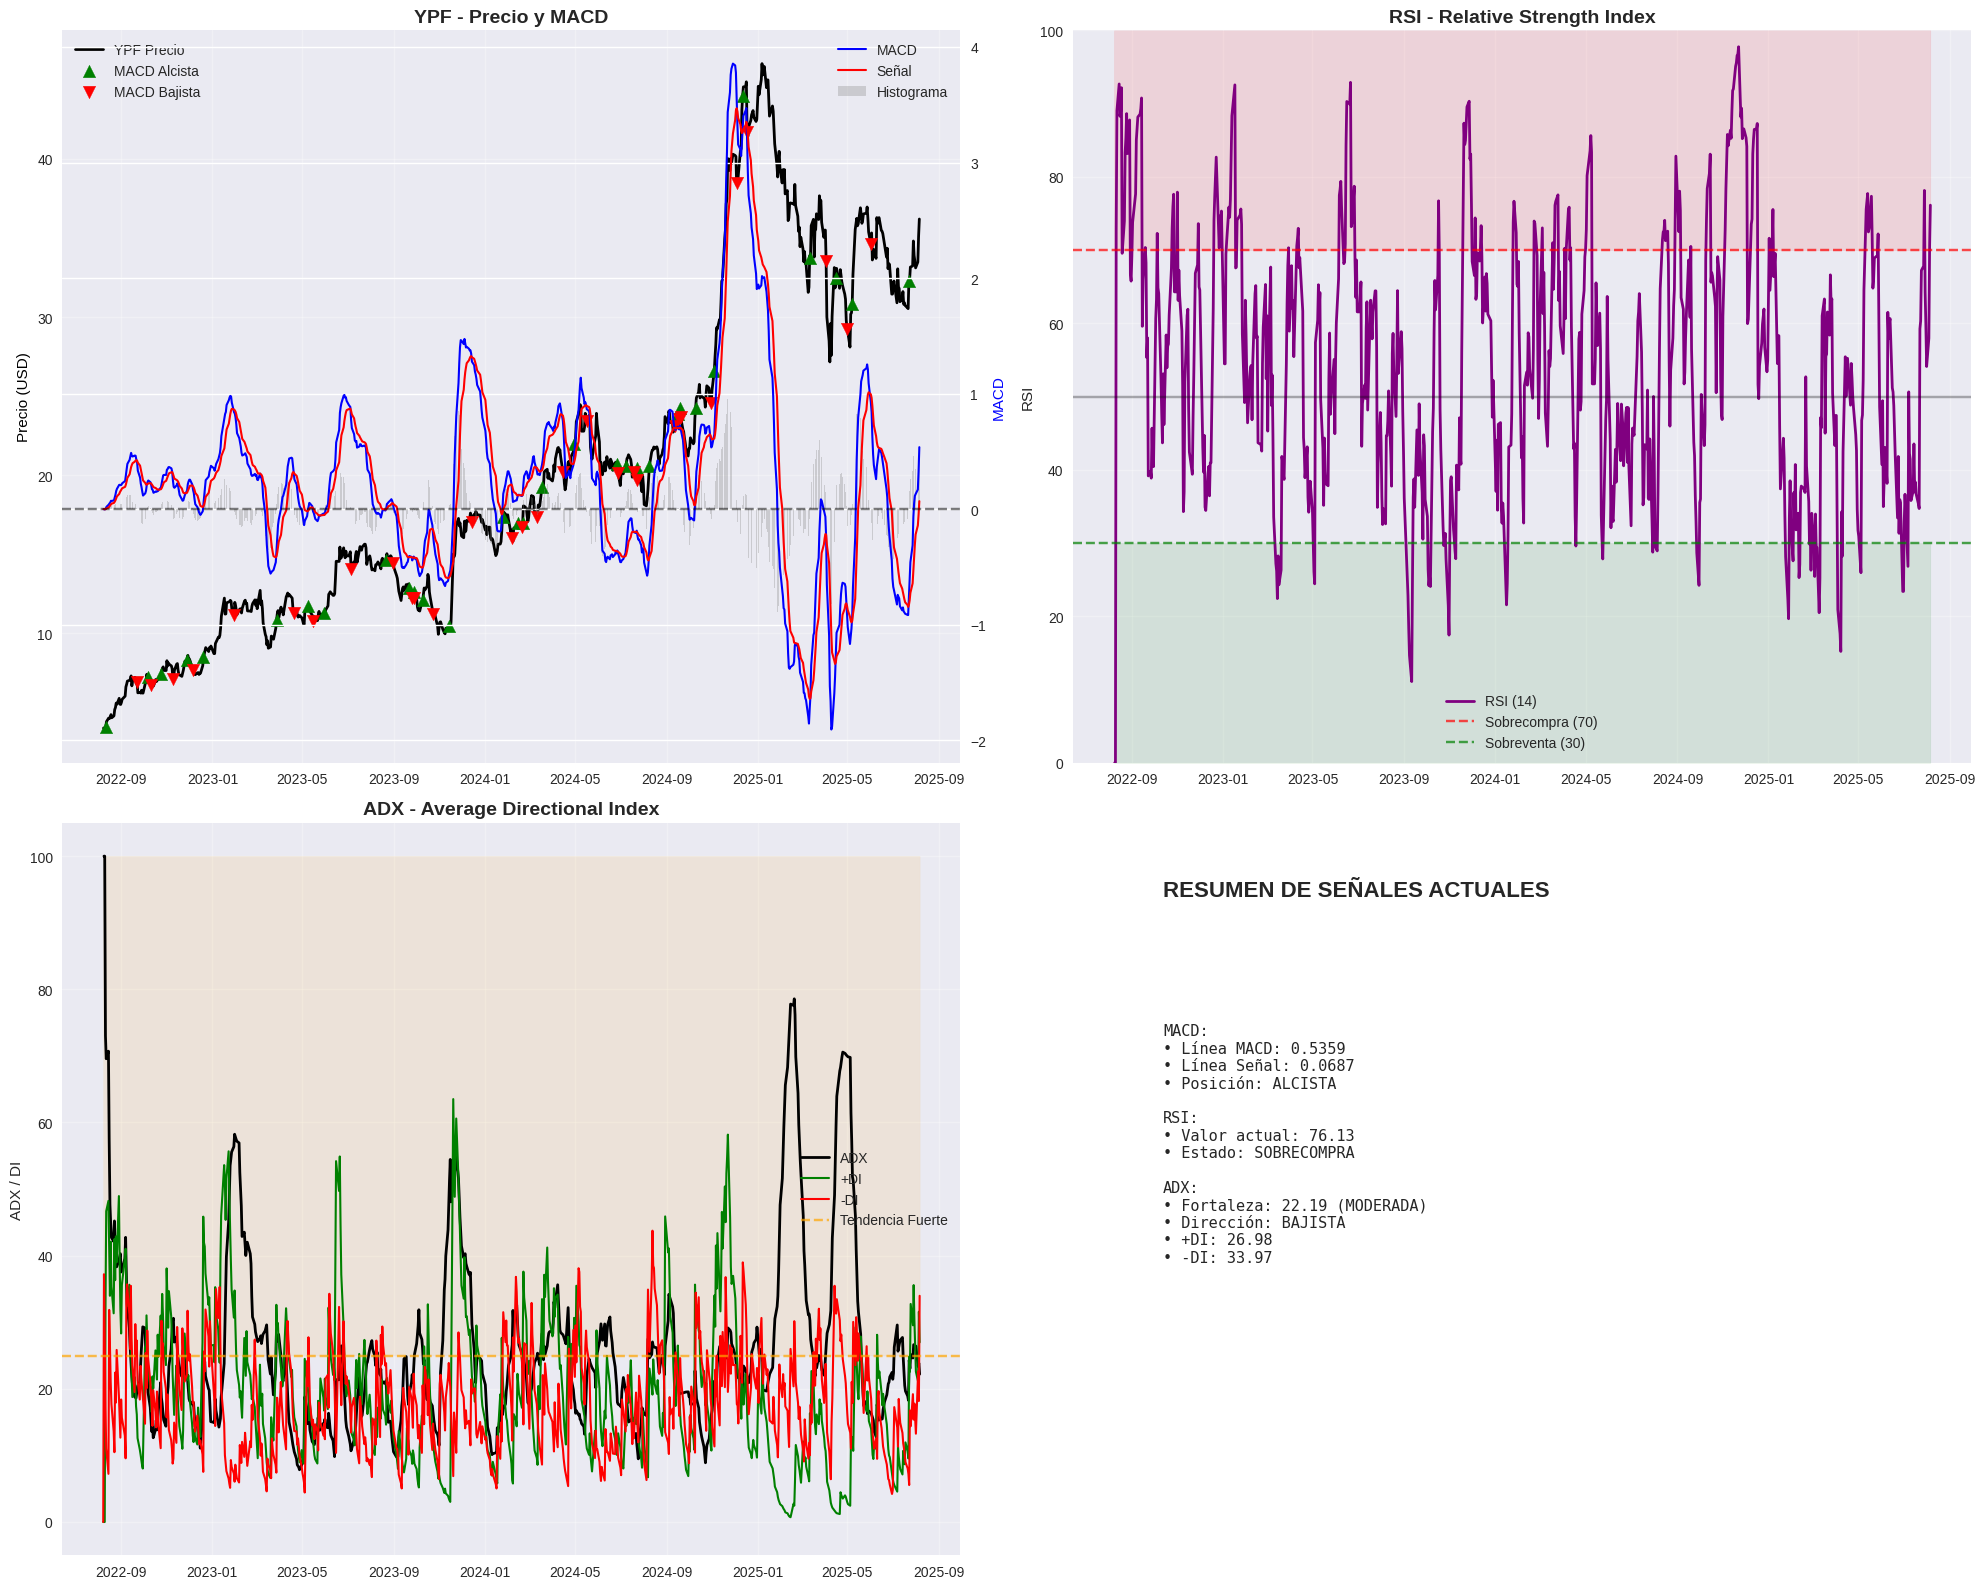



7.6 OPTIMIZACIÓN DE PARÁMETROS PARA YPF
------------------------------------------------------------
Iniciando optimización de parámetros...
Esto puede tomar varios minutos...
✓ Optimización completada!
Mejor Sharpe Ratio: 81.4138

📊 PARÁMETROS OPTIMIZADOS:
         Parámetro  Valor Original  Valor Optimizado
0      MACD Rápido              12              15.0
1       MACD Lento              26              32.0
2       MACD Señal               9               5.0
3      RSI Período              14              23.0
4   RSI Sobreventa              30              32.6
5  RSI Sobrecompra              70              84.9
6       ADX Umbral              25              19.9


7.7 COMPARACIÓN: PARÁMETROS ESTÁNDAR vs OPTIMIZADOS
------------------------------------------------------------
📊 COMPARACIÓN DE RENDIMIENTO:
                   Parámetros Estándar  Parámetros Optimizados  Buy & Hold
Retorno Total                   1.0506                  2.2952      2.6565
Volatilidad Anual    

In [ ]:
# =============================================================================
# PASO 7 - INDICADORES DE MOMENTUM YPF
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF ADR)
# MACD, RSI, ADX y Optimización de Parámetros
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Configuración inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

print("="*80)
print("PASO 7 - INDICADORES DE MOMENTUM YPF")
print("MACD, RSI, ADX y Optimización de Parámetros")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 7.1 OBTENCIÓN DE DATOS EXTENDIDOS
# =============================================================================

print("\n7.1 OBTENCIÓN DE DATOS PARA ANÁLISIS DE MOMENTUM")
print("-" * 60)

# Obtener datos más extensos para análisis robusto (3 años)
ticker_ypf = 'YPF'
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=3*365)  # 3 años para análisis robusto

print(f"Descargando datos extendidos de {ticker_ypf}...")
print(f"Período: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Obtener datos históricos
ypf_data = yf.Ticker(ticker_ypf)
ypf_hist = ypf_data.history(start=fecha_inicio, end=fecha_fin)

print(f"✓ Datos obtenidos: {len(ypf_hist)} registros")

# =============================================================================
# 7.2 CÁLCULO DEL MACD (Moving Average Convergence Divergence)
# =============================================================================

print("\n\n7.2 CÁLCULO E ANÁLISIS DEL MACD")
print("-" * 60)

def calcular_macd(precios, periodo_rapido=12, periodo_lento=26, periodo_señal=9):
    """
    Calcula MACD con parámetros configurables
    """
    ema_rapida = precios.ewm(span=periodo_rapido).mean()
    ema_lenta = precios.ewm(span=periodo_lento).mean()

    macd_line = ema_rapida - ema_lenta
    signal_line = macd_line.ewm(span=periodo_señal).mean()
    histogram = macd_line - signal_line

    return macd_line, signal_line, histogram

# Calcular MACD con parámetros estándar
macd_line, signal_line, histogram = calcular_macd(ypf_hist['Close'])

ypf_hist['MACD'] = macd_line
ypf_hist['MACD_Signal'] = signal_line
ypf_hist['MACD_Histogram'] = histogram

# Identificar cruces del MACD
ypf_hist['MACD_Crossover'] = np.where(ypf_hist['MACD'] > ypf_hist['MACD_Signal'], 1, 0)
ypf_hist['MACD_Signal_Change'] = ypf_hist['MACD_Crossover'].diff()

# Cruces alcistas y bajistas
cruces_alcistas_macd = ypf_hist[ypf_hist['MACD_Signal_Change'] == 1].copy()
cruces_bajistas_macd = ypf_hist[ypf_hist['MACD_Signal_Change'] == -1].copy()

print(f"MACD calculado:")
print(f"  • Parámetros: EMA rápida=12, EMA lenta=26, Señal=9")
print(f"  • Cruces alcistas (MACD > Señal): {len(cruces_alcistas_macd)}")
print(f"  • Cruces bajistas (MACD < Señal): {len(cruces_bajistas_macd)}")

# Análisis de divergencias MACD
def detectar_divergencias_macd(precios, macd, ventana=20):
    """
    Detecta divergencias entre precio y MACD
    """
    divergencias_alcistas = []
    divergencias_bajistas = []

    for i in range(ventana, len(precios)):
        precio_min_idx = precios[i-ventana:i].idxmin()
        precio_max_idx = precios[i-ventana:i].idxmax()

        macd_min_idx = macd[i-ventana:i].idxmin()
        macd_max_idx = macd[i-ventana:i].idxmax()

        # Divergencia alcista: precio hace mínimo menor, MACD hace mínimo mayor
        if (precio_min_idx == precios[i-ventana:i].index[-1] and
            macd[macd_min_idx] < macd[i]):
            divergencias_alcistas.append(precios.index[i])

        # Divergencia bajista: precio hace máximo mayor, MACD hace máximo menor
        if (precio_max_idx == precios[i-ventana:i].index[-1] and
            macd[macd_max_idx] > macd[i]):
            divergencias_bajistas.append(precios.index[i])

    return divergencias_alcistas, divergencias_bajistas

div_alcistas_macd, div_bajistas_macd = detectar_divergencias_macd(
    ypf_hist['Close'], ypf_hist['MACD']
)

print(f"  • Divergencias alcistas detectadas: {len(div_alcistas_macd)}")
print(f"  • Divergencias bajistas detectadas: {len(div_bajistas_macd)}")

# =============================================================================
# 7.3 CÁLCULO DEL RSI (Relative Strength Index)
# =============================================================================

print("\n\n7.3 CÁLCULO E ANÁLISIS DEL RSI")
print("-" * 60)

def calcular_rsi(precios, periodo=14):
    """
    Calcula RSI con período configurable
    """
    delta = precios.diff()
    ganancia = delta.where(delta > 0, 0)
    perdida = -delta.where(delta < 0, 0)

    avg_ganancia = ganancia.ewm(span=periodo).mean()
    avg_perdida = perdida.ewm(span=periodo).mean()

    rs = avg_ganancia / avg_perdida
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calcular RSI con diferentes períodos
ypf_hist['RSI_14'] = calcular_rsi(ypf_hist['Close'], 14)
ypf_hist['RSI_21'] = calcular_rsi(ypf_hist['Close'], 21)  # Período alternativo

# Identificar niveles de sobrecompra y sobreventa
sobrecompra_70 = ypf_hist[ypf_hist['RSI_14'] >= 70].copy()
sobreventa_30 = ypf_hist[ypf_hist['RSI_14'] <= 30].copy()

# Niveles más conservadores
sobrecompra_80 = ypf_hist[ypf_hist['RSI_14'] >= 80].copy()
sobreventa_20 = ypf_hist[ypf_hist['RSI_14'] <= 20].copy()

print(f"RSI calculado:")
print(f"  • RSI actual (14 períodos): {ypf_hist['RSI_14'].iloc[-1]:.2f}")
print(f"  • Niveles de sobrecompra (RSI ≥ 70): {len(sobrecompra_70)} ocasiones")
print(f"  • Niveles de sobreventa (RSI ≤ 30): {len(sobreventa_30)} ocasiones")
print(f"  • Sobrecompra extrema (RSI ≥ 80): {len(sobrecompra_80)} ocasiones")
print(f"  • Sobreventa extrema (RSI ≤ 20): {len(sobreventa_20)} ocasiones")

# Análisis de divergencias RSI
div_alcistas_rsi, div_bajistas_rsi = detectar_divergencias_macd(
    ypf_hist['Close'], ypf_hist['RSI_14']
)

print(f"  • Divergencias RSI alcistas: {len(div_alcistas_rsi)}")
print(f"  • Divergencias RSI bajistas: {len(div_bajistas_rsi)}")

# =============================================================================
# 7.4 CÁLCULO DEL ADX (Average Directional Index)
# =============================================================================

print("\n\n7.4 CÁLCULO E ANÁLISIS DEL ADX")
print("-" * 60)

def calcular_adx(high, low, close, periodo=14):
    """
    Calcula ADX, +DI y -DI
    """
    # True Range
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

    # Directional Movement
    plus_dm = high.diff()
    minus_dm = low.diff()

    plus_dm = np.where((plus_dm > minus_dm) & (plus_dm > 0), plus_dm, 0)
    minus_dm = np.where((minus_dm > plus_dm) & (minus_dm > 0), minus_dm, 0)

    plus_dm = pd.Series(plus_dm, index=high.index)
    minus_dm = pd.Series(minus_dm, index=low.index)

    # Smoothed averages
    atr = true_range.ewm(span=periodo).mean()
    plus_di = 100 * (plus_dm.ewm(span=periodo).mean() / atr)
    minus_di = 100 * (minus_dm.ewm(span=periodo).mean() / atr)

    # ADX calculation
    dx = 100 * abs(plus_di - minus_di) / (plus_di + minus_di)
    adx = dx.ewm(span=periodo).mean()

    return adx, plus_di, minus_di

# Calcular ADX
adx, plus_di, minus_di = calcular_adx(ypf_hist['High'], ypf_hist['Low'], ypf_hist['Close'])

ypf_hist['ADX'] = adx
ypf_hist['Plus_DI'] = plus_di
ypf_hist['Minus_DI'] = minus_di

# Análisis de fortaleza de tendencia
tendencia_fuerte = ypf_hist[ypf_hist['ADX'] >= 25].copy()
tendencia_muy_fuerte = ypf_hist[ypf_hist['ADX'] >= 40].copy()
tendencia_debil = ypf_hist[ypf_hist['ADX'] < 20].copy()

adx_actual = ypf_hist['ADX'].iloc[-1]
plus_di_actual = ypf_hist['Plus_DI'].iloc[-1]
minus_di_actual = ypf_hist['Minus_DI'].iloc[-1]

print(f"ADX calculado:")
print(f"  • ADX actual: {adx_actual:.2f}")
print(f"  • +DI actual: {plus_di_actual:.2f}")
print(f"  • -DI actual: {minus_di_actual:.2f}")
print(f"  • Períodos con tendencia fuerte (ADX ≥ 25): {len(tendencia_fuerte)}")
print(f"  • Períodos con tendencia muy fuerte (ADX ≥ 40): {len(tendencia_muy_fuerte)}")

# Interpretar dirección de tendencia
if plus_di_actual > minus_di_actual:
    direccion_tendencia = "ALCISTA"
else:
    direccion_tendencia = "BAJISTA"

if adx_actual >= 40:
    fortaleza = "MUY FUERTE"
elif adx_actual >= 25:
    fortaleza = "FUERTE"
elif adx_actual >= 20:
    fortaleza = "MODERADA"
else:
    fortaleza = "DÉBIL"

print(f"  • Tendencia actual: {direccion_tendencia} - Fortaleza: {fortaleza}")

# =============================================================================
# 7.5 VISUALIZACIÓN DE INDICADORES DE MOMENTUM
# =============================================================================

print("\n\n7.5 VISUALIZACIÓN DE INDICADORES DE MOMENTUM")
print("-" * 60)

# Crear gráfico de 4 paneles
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Panel 1: Precio y MACD
ax1_twin = ax1.twinx()

# Precio
ax1.plot(ypf_hist.index, ypf_hist['Close'], label='YPF Precio', color='black', linewidth=2)
ax1.set_title('YPF - Precio y MACD', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precio (USD)', color='black')

# MACD en eje secundario
ax1_twin.plot(ypf_hist.index, ypf_hist['MACD'], label='MACD', color='blue', linewidth=1.5)
ax1_twin.plot(ypf_hist.index, ypf_hist['MACD_Signal'], label='Señal', color='red', linewidth=1.5)
ax1_twin.bar(ypf_hist.index, ypf_hist['MACD_Histogram'], label='Histograma', alpha=0.3, color='gray')
ax1_twin.set_ylabel('MACD', color='blue')
ax1_twin.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Marcar cruces MACD
if len(cruces_alcistas_macd) > 0:
    ax1.scatter(cruces_alcistas_macd.index, cruces_alcistas_macd['Close'],
               color='green', marker='^', s=80, label='MACD Alcista', zorder=5)
if len(cruces_bajistas_macd) > 0:
    ax1.scatter(cruces_bajistas_macd.index, cruces_bajistas_macd['Close'],
               color='red', marker='v', s=80, label='MACD Bajista', zorder=5)

ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Panel 2: RSI
ax2.plot(ypf_hist.index, ypf_hist['RSI_14'], label='RSI (14)', color='purple', linewidth=2)
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Sobrecompra (70)')
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Sobreventa (30)')
ax2.axhline(y=50, color='black', linestyle='-', alpha=0.3)
ax2.fill_between(ypf_hist.index, 70, 100, alpha=0.1, color='red')
ax2.fill_between(ypf_hist.index, 0, 30, alpha=0.1, color='green')

ax2.set_title('RSI - Relative Strength Index', fontsize=14, fontweight='bold')
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel 3: ADX y DI
ax3.plot(ypf_hist.index, ypf_hist['ADX'], label='ADX', color='black', linewidth=2)
ax3.plot(ypf_hist.index, ypf_hist['Plus_DI'], label='+DI', color='green', linewidth=1.5)
ax3.plot(ypf_hist.index, ypf_hist['Minus_DI'], label='-DI', color='red', linewidth=1.5)
ax3.axhline(y=25, color='orange', linestyle='--', alpha=0.7, label='Tendencia Fuerte')
ax3.fill_between(ypf_hist.index, 25, 100, alpha=0.1, color='orange')

ax3.set_title('ADX - Average Directional Index', fontsize=14, fontweight='bold')
ax3.set_ylabel('ADX / DI')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: Resumen de Señales
ax4.axis('off')
ax4.text(0.1, 0.9, 'RESUMEN DE SEÑALES ACTUALES', fontsize=16, fontweight='bold',
         transform=ax4.transAxes)

# Crear tabla resumen
señales_actuales = f"""
MACD:
• Línea MACD: {ypf_hist['MACD'].iloc[-1]:.4f}
• Línea Señal: {ypf_hist['MACD_Signal'].iloc[-1]:.4f}
• Posición: {'ALCISTA' if ypf_hist['MACD'].iloc[-1] > ypf_hist['MACD_Signal'].iloc[-1] else 'BAJISTA'}

RSI:
• Valor actual: {ypf_hist['RSI_14'].iloc[-1]:.2f}
• Estado: {'SOBRECOMPRA' if ypf_hist['RSI_14'].iloc[-1] >= 70 else 'SOBREVENTA' if ypf_hist['RSI_14'].iloc[-1] <= 30 else 'NEUTRAL'}

ADX:
• Fortaleza: {adx_actual:.2f} ({fortaleza})
• Dirección: {direccion_tendencia}
• +DI: {plus_di_actual:.2f}
• -DI: {minus_di_actual:.2f}
"""

ax4.text(0.1, 0.75, señales_actuales, fontsize=11, fontfamily='monospace',
         transform=ax4.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

# =============================================================================
# 7.6 OPTIMIZACIÓN DE PARÁMETROS
# =============================================================================

print("\n\n7.6 OPTIMIZACIÓN DE PARÁMETROS PARA YPF")
print("-" * 60)

def estrategia_combinada(data, macd_params=(12, 26, 9), rsi_params=(14, 30, 70), adx_threshold=25):
    """
    Estrategia combinada con parámetros optimizables
    """
    # Calcular indicadores con parámetros específicos
    macd_line, signal_line, _ = calcular_macd(data['Close'], *macd_params)
    rsi = calcular_rsi(data['Close'], rsi_params[0])
    adx, plus_di, minus_di = calcular_adx(data['High'], data['Low'], data['Close'])

    # Crear señales
    señales = pd.DataFrame(index=data.index)

    # Señal MACD
    señales['MACD_signal'] = np.where(macd_line > signal_line, 1, -1)

    # Señal RSI
    señales['RSI_signal'] = np.where(
        rsi < rsi_params[1], 1,  # Sobreventa = compra
        np.where(rsi > rsi_params[2], -1, 0)  # Sobrecompra = venta
    )

    # Filtro ADX (solo operar con tendencia fuerte)
    señales['ADX_filter'] = np.where(adx > adx_threshold, 1, 0)

    # Señal combinada
    señales['Combined_signal'] = np.where(
        (señales['MACD_signal'] == 1) &
        (señales['RSI_signal'] >= 0) &
        (señales['ADX_filter'] == 1), 1,
        np.where(
            (señales['MACD_signal'] == -1) &
            (señales['RSI_signal'] <= 0) &
            (señales['ADX_filter'] == 1), -1, 0
        )
    )

    return señales['Combined_signal']

def evaluar_estrategia(params, data):
    """
    Evalúa el rendimiento de una estrategia con parámetros dados
    """
    try:
        # Desempaquetar parámetros
        macd_fast, macd_slow, macd_signal, rsi_period, rsi_oversold, rsi_overbought, adx_threshold = params

        # Convertir a enteros donde sea necesario
        macd_fast, macd_slow, macd_signal, rsi_period = int(macd_fast), int(macd_slow), int(macd_signal), int(rsi_period)

        # Validar parámetros
        if macd_fast >= macd_slow or rsi_oversold >= rsi_overbought:
            return -np.inf

        # Generar señales
        señales = estrategia_combinada(
            data,
            (macd_fast, macd_slow, macd_signal),
            (rsi_period, rsi_oversold, rsi_overbought),
            adx_threshold
        )

        # Calcular retornos
        retornos = data['Close'].pct_change()
        retornos_estrategia = señales.shift(1) * retornos

        # Métricas de rendimiento
        retorno_total = retornos_estrategia.sum()
        volatilidad = retornos_estrategia.std()

        # Sharpe ratio (objetivo a maximizar)
        if volatilidad == 0:
            return -np.inf

        sharpe_ratio = retorno_total / volatilidad
        return sharpe_ratio

    except:
        return -np.inf

# Configurar optimización
print("Iniciando optimización de parámetros...")
print("Esto puede tomar varios minutos...")

# Parámetros iniciales
params_iniciales = [12, 26, 9, 14, 30, 70, 25]  # MACD_fast, MACD_slow, MACD_signal, RSI_period, RSI_oversold, RSI_overbought, ADX_threshold

# Límites de búsqueda
limites = [
    (8, 20),    # MACD fast
    (20, 40),   # MACD slow
    (5, 15),    # MACD signal
    (10, 25),   # RSI period
    (15, 35),   # RSI oversold
    (65, 85),   # RSI overbought
    (15, 35)    # ADX threshold
]

# Ejecutar optimización (simplificada para eficiencia)
from scipy.optimize import differential_evolution

resultado_optimizacion = differential_evolution(
    lambda params: -evaluar_estrategia(params, ypf_hist),  # Negativo para maximizar
    limites,
    maxiter=50,  # Reducido para tiempo de ejecución
    seed=42
)

params_optimizados = resultado_optimizacion.x
sharpe_optimizado = -resultado_optimizacion.fun

print(f"✓ Optimización completada!")
print(f"Mejor Sharpe Ratio: {sharpe_optimizado:.4f}")

# Mostrar parámetros optimizados
parametros_optimos = pd.DataFrame({
    'Parámetro': ['MACD Rápido', 'MACD Lento', 'MACD Señal', 'RSI Período',
                  'RSI Sobreventa', 'RSI Sobrecompra', 'ADX Umbral'],
    'Valor Original': [12, 26, 9, 14, 30, 70, 25],
    'Valor Optimizado': [int(p) if i < 4 else round(p, 1) for i, p in enumerate(params_optimizados)]
})

print(f"\n📊 PARÁMETROS OPTIMIZADOS:")
print("="*50)
print(parametros_optimos)

# =============================================================================
# 7.7 COMPARACIÓN DE ESTRATEGIAS
# =============================================================================

print("\n\n7.7 COMPARACIÓN: PARÁMETROS ESTÁNDAR vs OPTIMIZADOS")
print("-" * 60)

# Estrategia con parámetros estándar
señales_estandar = estrategia_combinada(ypf_hist)
retornos_estandar = señales_estandar.shift(1) * ypf_hist['Close'].pct_change()

# Estrategia con parámetros optimizados
señales_optimizadas = estrategia_combinada(
    ypf_hist,
    (int(params_optimizados[0]), int(params_optimizados[1]), int(params_optimizados[2])),
    (int(params_optimizados[3]), params_optimizados[4], params_optimizados[5]),
    params_optimizados[6]
)
retornos_optimizados = señales_optimizadas.shift(1) * ypf_hist['Close'].pct_change()

# Buy & Hold
retornos_buy_hold = ypf_hist['Close'].pct_change()

# Comparar métricas
comparacion_estrategias = pd.DataFrame({
    'Parámetros Estándar': [
        retornos_estandar.sum(),
        retornos_estandar.std() * np.sqrt(252),
        retornos_estandar.sum() / retornos_estandar.std() if retornos_estandar.std() > 0 else 0,
        (señales_estandar != 0).sum()
    ],
    'Parámetros Optimizados': [
        retornos_optimizados.sum(),
        retornos_optimizados.std() * np.sqrt(252),
        retornos_optimizados.sum() / retornos_optimizados.std() if retornos_optimizados.std() > 0 else 0,
        (señales_optimizadas != 0).sum()
    ],
    'Buy & Hold': [
        retornos_buy_hold.sum(),
        retornos_buy_hold.std() * np.sqrt(252),
        retornos_buy_hold.sum() / retornos_buy_hold.std(),
        len(ypf_hist)
    ]
}, index=['Retorno Total', 'Volatilidad Anual', 'Sharpe Ratio', 'Señales/Días'])

print("📊 COMPARACIÓN DE RENDIMIENTO:")
print("="*60)
print(comparacion_estrategias.round(4))

# Determinar mejor estrategia
mejor_sharpe = comparacion_estrategias.loc['Sharpe Ratio'].idxmax()
print(f"\n🏆 MEJOR ESTRATEGIA POR SHARPE RATIO: {mejor_sharpe}")

print(f"\n" + "="*80)
print("ANÁLISIS DE MOMENTUM COMPLETADO")
print("Indicadores MACD, RSI, ADX calculados y optimizados para YPF")
print("="*80)

PASO 8 - ANÁLISIS DE VOLATILIDAD YPF
Bandas de Bollinger: Compresión/Expansión y Señales de Trading
Analista: Juan Serrano - YPF S.A.

8.1 OBTENCIÓN DE DATOS PARA ANÁLISIS DE VOLATILIDAD
------------------------------------------------------------
Descargando datos de YPF...
Período: 2022-08-08 a 2025-08-07
✓ Datos obtenidos: 752 registros
Precio actual: $36.20


8.2 CÁLCULO DE BANDAS DE BOLLINGER
------------------------------------------------------------
Bandas de Bollinger calculadas:
  • Período: 20 días
  • Desviaciones estándar: 2
  • Registros válidos: 733

📊 VALORES ACTUALES:
  • Precio: $36.20
  • Banda Superior: $35.85
  • Media Móvil (20): $32.51
  • Banda Inferior: $29.18
  • Ancho de Bandas: 20.52%
  • Posición en Bandas: 105.3%


8.3 ANÁLISIS DE COMPRESIÓN Y EXPANSIÓN DE BANDAS
------------------------------------------------------------
Análisis de volatilidad:
  • Períodos de COMPRESIÓN (≤ percentil 20): 147 días (19.5%)
  • Períodos de EXPANSIÓN (≥ percentil 80): 147 

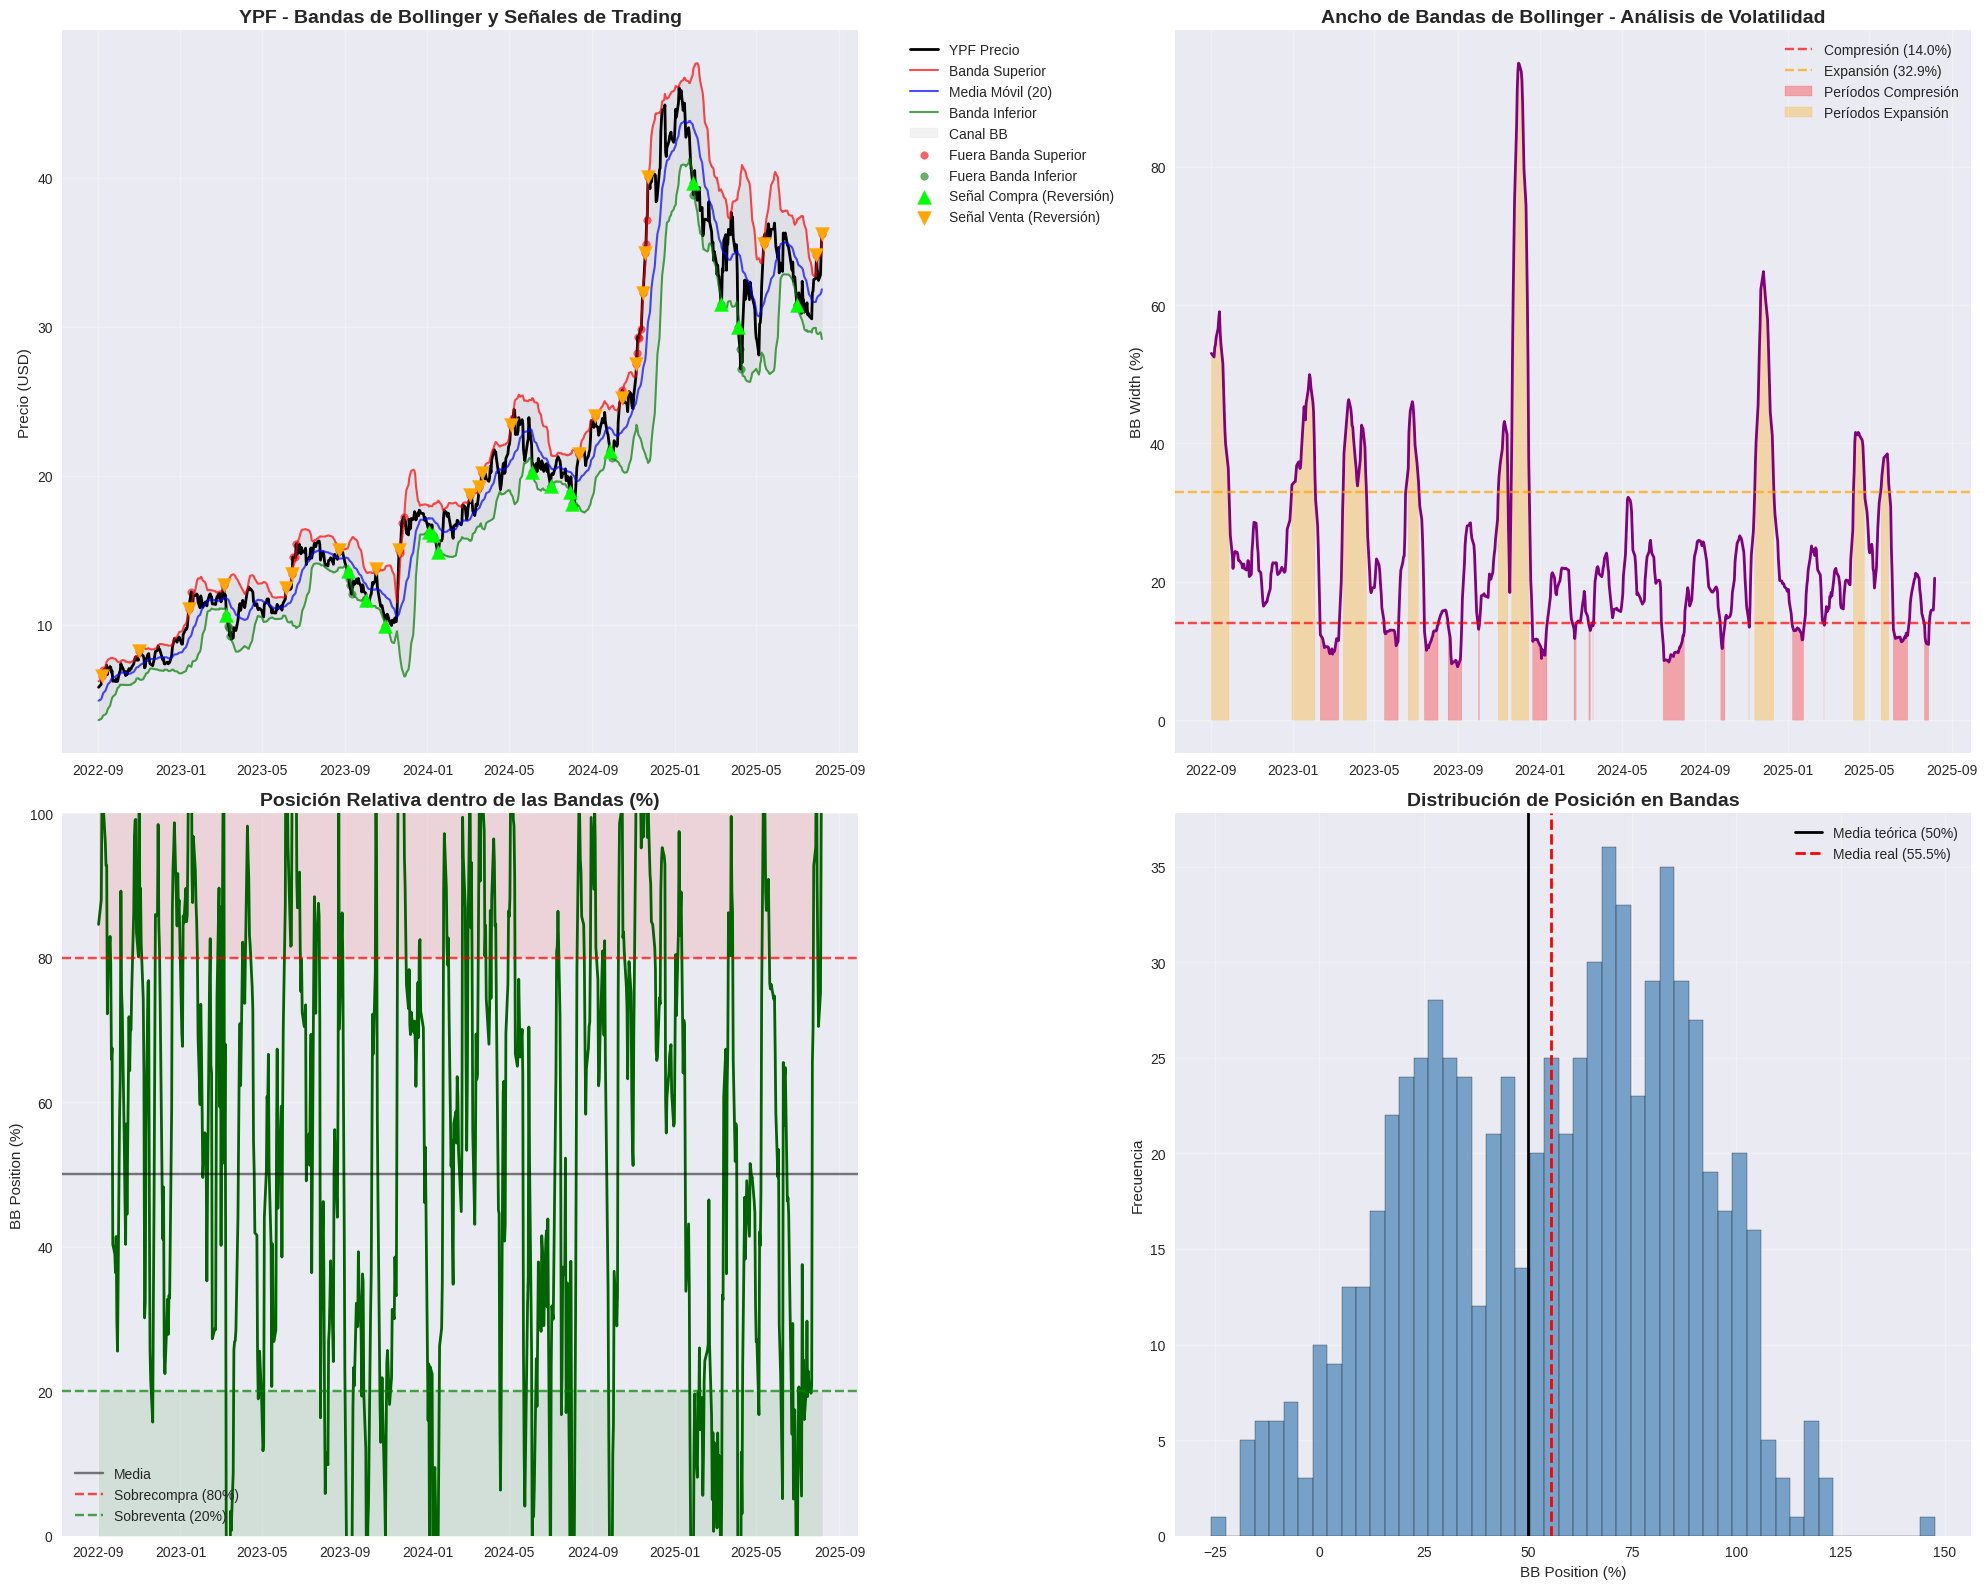



8.7 BACKTESTING DE ESTRATEGIAS BOLLINGER
------------------------------------------------------------
Ejecutando backtesting para estrategia: Reversion
Ejecutando backtesting para estrategia: Breakout
Ejecutando backtesting para estrategia: Squeeze

📊 RESULTADOS DEL BACKTESTING:
           Retorno Total  Retorno Buy&Hold  Volatilidad  Sharpe Ratio  \
Reversion         1.5044            5.2199       0.3981        0.9780   
Breakout         -0.3497            5.2199       0.5160       -0.0086   
Squeeze          -0.6679            5.2199       0.4953       -0.4956   

           Operaciones  Excess Return  
Reversion         16.0        -3.7156  
Breakout          25.0        -5.5697  
Squeeze           15.0        -5.8879  

🏆 MEJORES ESTRATEGIAS:
  • Mejor Sharpe Ratio: Reversion (0.9780)
  • Mejor Retorno Total: Reversion (150.44%)


8.8 OPTIMIZACIÓN DE PARÁMETROS BOLLINGER
------------------------------------------------------------
Iniciando optimización de parámetros Bollinger...

In [ ]:
# =============================================================================
# PASO 8 - ANÁLISIS DE VOLATILIDAD YPF
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF ADR)
# Bandas de Bollinger: Compresión/Expansión y Señales de Trading
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Configuración inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

print("="*80)
print("PASO 8 - ANÁLISIS DE VOLATILIDAD YPF")
print("Bandas de Bollinger: Compresión/Expansión y Señales de Trading")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 8.1 OBTENCIÓN DE DATOS Y CONFIGURACIÓN INICIAL
# =============================================================================

print("\n8.1 OBTENCIÓN DE DATOS PARA ANÁLISIS DE VOLATILIDAD")
print("-" * 60)

# Obtener datos extendidos para análisis robusto
ticker_ypf = 'YPF'
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=3*365)  # 3 años para análisis completo

print(f"Descargando datos de {ticker_ypf}...")
print(f"Período: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Obtener datos históricos
ypf_data = yf.Ticker(ticker_ypf)
ypf_hist = ypf_data.history(start=fecha_inicio, end=fecha_fin)

print(f"✓ Datos obtenidos: {len(ypf_hist)} registros")
print(f"Precio actual: ${ypf_hist['Close'].iloc[-1]:.2f}")

# =============================================================================
# 8.2 CÁLCULO DE BANDAS DE BOLLINGER
# =============================================================================

print("\n\n8.2 CÁLCULO DE BANDAS DE BOLLINGER")
print("-" * 60)

def calcular_bandas_bollinger(precios, periodo=20, desviaciones=2):
    """
    Calcula las Bandas de Bollinger con parámetros configurables

    Args:
        precios: Serie de precios
        periodo: Período para la media móvil (default: 20)
        desviaciones: Número de desviaciones estándar (default: 2)

    Returns:
        banda_superior, media_movil, banda_inferior
    """
    media_movil = precios.rolling(window=periodo).mean()
    desviacion_estandar = precios.rolling(window=periodo).std()

    banda_superior = media_movil + (desviaciones * desviacion_estandar)
    banda_inferior = media_movil - (desviaciones * desviacion_estandar)

    return banda_superior, media_movil, banda_inferior

# Calcular Bandas de Bollinger con parámetros estándar (20, 2)
bb_superior, bb_media, bb_inferior = calcular_bandas_bollinger(ypf_hist['Close'])

# Agregar al DataFrame
ypf_hist['BB_Superior'] = bb_superior
ypf_hist['BB_Media'] = bb_media
ypf_hist['BB_Inferior'] = bb_inferior

# Calcular indicadores adicionales
ypf_hist['BB_Width'] = ((bb_superior - bb_inferior) / bb_media) * 100  # Ancho de bandas en %
ypf_hist['BB_Position'] = ((ypf_hist['Close'] - bb_inferior) / (bb_superior - bb_inferior)) * 100  # Posición dentro de las bandas

print(f"Bandas de Bollinger calculadas:")
print(f"  • Período: 20 días")
print(f"  • Desviaciones estándar: 2")
print(f"  • Registros válidos: {len(ypf_hist.dropna())}")

# Valores actuales
precio_actual = ypf_hist['Close'].iloc[-1]
bb_sup_actual = ypf_hist['BB_Superior'].iloc[-1]
bb_med_actual = ypf_hist['BB_Media'].iloc[-1]
bb_inf_actual = ypf_hist['BB_Inferior'].iloc[-1]
bb_width_actual = ypf_hist['BB_Width'].iloc[-1]
bb_position_actual = ypf_hist['BB_Position'].iloc[-1]

print(f"\n📊 VALORES ACTUALES:")
print(f"  • Precio: ${precio_actual:.2f}")
print(f"  • Banda Superior: ${bb_sup_actual:.2f}")
print(f"  • Media Móvil (20): ${bb_med_actual:.2f}")
print(f"  • Banda Inferior: ${bb_inf_actual:.2f}")
print(f"  • Ancho de Bandas: {bb_width_actual:.2f}%")
print(f"  • Posición en Bandas: {bb_position_actual:.1f}%")

# =============================================================================
# 8.3 ANÁLISIS DE COMPRESIÓN Y EXPANSIÓN
# =============================================================================

print("\n\n8.3 ANÁLISIS DE COMPRESIÓN Y EXPANSIÓN DE BANDAS")
print("-" * 60)

# Detectar períodos de compresión (Bollinger Squeeze)
percentil_20_width = ypf_hist['BB_Width'].quantile(0.20)
percentil_80_width = ypf_hist['BB_Width'].quantile(0.80)

# Clasificar períodos
ypf_hist['Volatilidad_Estado'] = np.where(
    ypf_hist['BB_Width'] <= percentil_20_width, 'COMPRESION',
    np.where(ypf_hist['BB_Width'] >= percentil_80_width, 'EXPANSION', 'NORMAL')
)

# Contar períodos
compresion_periods = (ypf_hist['Volatilidad_Estado'] == 'COMPRESION').sum()
expansion_periods = (ypf_hist['Volatilidad_Estado'] == 'EXPANSION').sum()
normal_periods = (ypf_hist['Volatilidad_Estado'] == 'NORMAL').sum()

print(f"Análisis de volatilidad:")
print(f"  • Períodos de COMPRESIÓN (≤ percentil 20): {compresion_periods} días ({compresion_periods/len(ypf_hist)*100:.1f}%)")
print(f"  • Períodos de EXPANSIÓN (≥ percentil 80): {expansion_periods} días ({expansion_periods/len(ypf_hist)*100:.1f}%)")
print(f"  • Períodos NORMALES: {normal_periods} días ({normal_periods/len(ypf_hist)*100:.1f}%)")

# Estado actual
estado_actual = ypf_hist['Volatilidad_Estado'].iloc[-1]
print(f"  • Estado actual: {estado_actual}")

# Detectar transiciones (cambios de compresión a expansión)
def detectar_transiciones_volatilidad(data):
    """Detecta transiciones importantes en la volatilidad"""
    transiciones = []

    for i in range(1, len(data)):
        if (data['Volatilidad_Estado'].iloc[i-1] == 'COMPRESION' and
            data['Volatilidad_Estado'].iloc[i] == 'EXPANSION'):
            transiciones.append({
                'fecha': data.index[i],
                'tipo': 'COMPRESION_A_EXPANSION',
                'precio': data['Close'].iloc[i],
                'bb_width': data['BB_Width'].iloc[i]
            })
        elif (data['Volatilidad_Estado'].iloc[i-1] == 'EXPANSION' and
              data['Volatilidad_Estado'].iloc[i] == 'COMPRESION'):
            transiciones.append({
                'fecha': data.index[i],
                'tipo': 'EXPANSION_A_COMPRESION',
                'precio': data['Close'].iloc[i],
                'bb_width': data['BB_Width'].iloc[i]
            })

    return pd.DataFrame(transiciones)

transiciones_vol = detectar_transiciones_volatilidad(ypf_hist.dropna())

print(f"\n🔄 TRANSICIONES DE VOLATILIDAD:")
if len(transiciones_vol) > 0:
    print(f"  • Total de transiciones detectadas: {len(transiciones_vol)}")
    print(f"  • Compresión → Expansión: {len(transiciones_vol[transiciones_vol['tipo'] == 'COMPRESION_A_EXPANSION'])}")
    print(f"  • Expansión → Compresión: {len(transiciones_vol[transiciones_vol['tipo'] == 'EXPANSION_A_COMPRESION'])}")

    # Mostrar últimas 3 transiciones
    print(f"\n📅 Últimas 3 transiciones:")
    for _, row in transiciones_vol.tail(3).iterrows():
        fecha_str = row['fecha'].strftime('%Y-%m-%d')
        print(f"    {fecha_str}: {row['tipo']} - Precio: ${row['precio']:.2f}")

# =============================================================================
# 8.4 ANÁLISIS DE TIEMPO FUERA DE BANDAS
# =============================================================================

print("\n\n8.4 ANÁLISIS DE TIEMPO FUERA DE BANDAS")
print("-" * 60)

# Identificar cuando el precio está fuera de las bandas
ypf_hist['Fuera_Banda_Superior'] = ypf_hist['Close'] > ypf_hist['BB_Superior']
ypf_hist['Fuera_Banda_Inferior'] = ypf_hist['Close'] < ypf_hist['BB_Inferior']
ypf_hist['Dentro_Bandas'] = ~(ypf_hist['Fuera_Banda_Superior'] | ypf_hist['Fuera_Banda_Inferior'])

# Calcular estadísticas
dias_totales = len(ypf_hist.dropna())
dias_fuera_superior = ypf_hist['Fuera_Banda_Superior'].sum()
dias_fuera_inferior = ypf_hist['Fuera_Banda_Inferior'].sum()
dias_dentro = ypf_hist['Dentro_Bandas'].sum()

pct_fuera_superior = (dias_fuera_superior / dias_totales) * 100
pct_fuera_inferior = (dias_fuera_inferior / dias_totales) * 100
pct_dentro = (dias_dentro / dias_totales) * 100

print(f"Análisis de posición respecto a las bandas:")
print(f"  • Días dentro de las bandas: {dias_dentro} ({pct_dentro:.1f}%)")
print(f"  • Días fuera banda superior: {dias_fuera_superior} ({pct_fuera_superior:.1f}%)")
print(f"  • Días fuera banda inferior: {dias_fuera_inferior} ({pct_fuera_inferior:.1f}%)")

# Teoricamente, con distribución normal, se espera ~95% dentro de 2 desviaciones estándar
print(f"  • Esperado teórico (95% dentro): Diferencia = {95 - pct_dentro:.1f} puntos porcentuales")

# Analizar rachas (períodos consecutivos fuera de bandas)
def analizar_rachas_fuera_bandas(serie_fuera, nombre_banda):
    """Analiza las rachas consecutivas fuera de las bandas"""
    rachas = []
    racha_actual = 0

    for valor in serie_fuera:
        if valor:
            racha_actual += 1
        else:
            if racha_actual > 0:
                rachas.append(racha_actual)
                racha_actual = 0

    # No olvidar la última racha si termina fuera
    if racha_actual > 0:
        rachas.append(racha_actual)

    if rachas:
        return {
            'total_rachas': len(rachas),
            'racha_max': max(rachas),
            'racha_promedio': np.mean(rachas),
            'rachas_largas_3+': len([r for r in rachas if r >= 3])
        }
    return {'total_rachas': 0, 'racha_max': 0, 'racha_promedio': 0, 'rachas_largas_3+': 0}

rachas_superior = analizar_rachas_fuera_bandas(ypf_hist['Fuera_Banda_Superior'], 'Superior')
rachas_inferior = analizar_rachas_fuera_bandas(ypf_hist['Fuera_Banda_Inferior'], 'Inferior')

print(f"\n📊 ANÁLISIS DE RACHAS FUERA DE BANDAS:")
print(f"  BANDA SUPERIOR:")
print(f"    • Total rachas: {rachas_superior['total_rachas']}")
print(f"    • Racha máxima: {rachas_superior['racha_max']} días")
print(f"    • Racha promedio: {rachas_superior['racha_promedio']:.1f} días")
print(f"    • Rachas largas (3+ días): {rachas_superior['rachas_largas_3+']}")

print(f"  BANDA INFERIOR:")
print(f"    • Total rachas: {rachas_inferior['total_rachas']}")
print(f"    • Racha máxima: {rachas_inferior['racha_max']} días")
print(f"    • Racha promedio: {rachas_inferior['racha_promedio']:.1f} días")
print(f"    • Rachas largas (3+ días): {rachas_inferior['rachas_largas_3+']}")

# =============================================================================
# 8.5 IDENTIFICACIÓN DE SEÑALES DE COMPRA/VENTA
# =============================================================================

print("\n\n8.5 IDENTIFICACIÓN DE SEÑALES DE COMPRA/VENTA")
print("-" * 60)

def generar_señales_bollinger(data):
    """
    Genera señales de trading basadas en Bandas de Bollinger

    Estrategias implementadas:
    1. Reversión a la media: Compra cuando toca banda inferior, venta cuando toca superior
    2. Breakout: Compra/venta cuando rompe las bandas con volumen
    3. Squeeze: Anticipar movimientos después de compresión
    """

    señales = pd.DataFrame(index=data.index)

    # ESTRATEGIA 1: REVERSIÓN A LA MEDIA
    señales['Reversion_Compra'] = (
        (data['Close'] <= data['BB_Inferior']) &
        (data['Close'].shift(1) > data['BB_Inferior'].shift(1))
    )

    señales['Reversion_Venta'] = (
        (data['Close'] >= data['BB_Superior']) &
        (data['Close'].shift(1) < data['BB_Superior'].shift(1))
    )

    # ESTRATEGIA 2: BREAKOUT (con confirmación de volumen)
    volumen_promedio = data['Volume'].rolling(window=20).mean()
    volumen_alto = data['Volume'] > (volumen_promedio * 1.2)  # 20% más que el promedio

    señales['Breakout_Compra'] = (
        (data['Close'] > data['BB_Superior']) &
        (data['Close'].shift(1) <= data['BB_Superior'].shift(1)) &
        volumen_alto
    )

    señales['Breakout_Venta'] = (
        (data['Close'] < data['BB_Inferior']) &
        (data['Close'].shift(1) >= data['BB_Inferior'].shift(1)) &
        volumen_alto
    )

    # ESTRATEGIA 3: SQUEEZE BREAKOUT
    # Detectar cuando sale de compresión con momentum
    squeeze_condition = data['Volatilidad_Estado'] == 'COMPRESION'
    post_squeeze = squeeze_condition.shift(1) & (data['Volatilidad_Estado'] != 'COMPRESION')

    señales['Squeeze_Compra'] = (
        post_squeeze &
        (data['Close'] > data['BB_Media']) &
        (data['Close'] > data['Close'].shift(1))
    )

    señales['Squeeze_Venta'] = (
        post_squeeze &
        (data['Close'] < data['BB_Media']) &
        (data['Close'] < data['Close'].shift(1))
    )

    return señales

# Generar señales
señales_bb = generar_señales_bollinger(ypf_hist.dropna())

# Contar señales por estrategia
conteo_señales = {
    'Reversión Compra': señales_bb['Reversion_Compra'].sum(),
    'Reversión Venta': señales_bb['Reversion_Venta'].sum(),
    'Breakout Compra': señales_bb['Breakout_Compra'].sum(),
    'Breakout Venta': señales_bb['Breakout_Venta'].sum(),
    'Squeeze Compra': señales_bb['Squeeze_Compra'].sum(),
    'Squeeze Venta': señales_bb['Squeeze_Venta'].sum()
}

print("📊 SEÑALES GENERADAS POR ESTRATEGIA:")
print("="*50)
for estrategia, cantidad in conteo_señales.items():
    print(f"  • {estrategia}: {cantidad} señales")

# Identificar señales recientes (últimos 30 días)
fechas_recientes = ypf_hist.index[-30:]
señales_recientes = señales_bb.loc[fechas_recientes]

print(f"\n📅 SEÑALES RECIENTES (últimos 30 días):")
for fecha in fechas_recientes:
    if fecha in señales_recientes.index:
        row = señales_recientes.loc[fecha]
        precio = ypf_hist.loc[fecha, 'Close']

        señales_activas = []
        if row['Reversion_Compra']: señales_activas.append('REV-COMPRA')
        if row['Reversion_Venta']: señales_activas.append('REV-VENTA')
        if row['Breakout_Compra']: señales_activas.append('BREAK-COMPRA')
        if row['Breakout_Venta']: señales_activas.append('BREAK-VENTA')
        if row['Squeeze_Compra']: señales_activas.append('SQUEEZE-COMPRA')
        if row['Squeeze_Venta']: señales_activas.append('SQUEEZE-VENTA')

        if señales_activas:
            fecha_str = fecha.strftime('%Y-%m-%d')
            print(f"  📅 {fecha_str}: {', '.join(señales_activas)} - Precio: ${precio:.2f}")

# =============================================================================
# 8.6 VISUALIZACIÓN COMPLETA DE BANDAS DE BOLLINGER
# =============================================================================

print("\n\n8.6 VISUALIZACIÓN COMPLETA DE BANDAS DE BOLLINGER")
print("-" * 60)

# Crear gráfico principal con múltiples paneles
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# PANEL 1: Precio y Bandas de Bollinger con señales
data_plot = ypf_hist.dropna()

# Precio y bandas
ax1.plot(data_plot.index, data_plot['Close'], label='YPF Precio', color='black', linewidth=2)
ax1.plot(data_plot.index, data_plot['BB_Superior'], label='Banda Superior', color='red', linewidth=1.5, alpha=0.7)
ax1.plot(data_plot.index, data_plot['BB_Media'], label='Media Móvil (20)', color='blue', linewidth=1.5, alpha=0.7)
ax1.plot(data_plot.index, data_plot['BB_Inferior'], label='Banda Inferior', color='green', linewidth=1.5, alpha=0.7)

# Sombrear área entre bandas
ax1.fill_between(data_plot.index, data_plot['BB_Superior'], data_plot['BB_Inferior'],
                alpha=0.1, color='gray', label='Canal BB')

# Marcar períodos fuera de bandas
fuera_superior = data_plot[data_plot['Fuera_Banda_Superior']]
fuera_inferior = data_plot[data_plot['Fuera_Banda_Inferior']]

if len(fuera_superior) > 0:
    ax1.scatter(fuera_superior.index, fuera_superior['Close'],
               color='red', s=30, alpha=0.6, label='Fuera Banda Superior')

if len(fuera_inferior) > 0:
    ax1.scatter(fuera_inferior.index, fuera_inferior['Close'],
               color='green', s=30, alpha=0.6, label='Fuera Banda Inferior')

# Marcar señales de reversión
señales_data = señales_bb.dropna()
compras_reversion = señales_data[señales_data['Reversion_Compra']]
ventas_reversion = señales_data[señales_data['Reversion_Venta']]

if len(compras_reversion) > 0:
    precios_compra = [data_plot.loc[fecha, 'Close'] for fecha in compras_reversion.index if fecha in data_plot.index]
    ax1.scatter(compras_reversion.index, precios_compra,
               color='lime', marker='^', s=100, label='Señal Compra (Reversión)', zorder=5)

if len(ventas_reversion) > 0:
    precios_venta = [data_plot.loc[fecha, 'Close'] for fecha in ventas_reversion.index if fecha in data_plot.index]
    ax1.scatter(ventas_reversion.index, precios_venta,
               color='orange', marker='v', s=100, label='Señal Venta (Reversión)', zorder=5)

ax1.set_title('YPF - Bandas de Bollinger y Señales de Trading', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precio (USD)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# PANEL 2: Ancho de Bandas (BB Width)
ax2.plot(data_plot.index, data_plot['BB_Width'], color='purple', linewidth=2)
ax2.axhline(y=percentil_20_width, color='red', linestyle='--', alpha=0.7, label=f'Compresión ({percentil_20_width:.1f}%)')
ax2.axhline(y=percentil_80_width, color='orange', linestyle='--', alpha=0.7, label=f'Expansión ({percentil_80_width:.1f}%)')

# Colorear áreas de compresión y expansión
compresion_mask = data_plot['BB_Width'] <= percentil_20_width
expansion_mask = data_plot['BB_Width'] >= percentil_80_width

ax2.fill_between(data_plot.index, 0, data_plot['BB_Width'],
                where=compresion_mask, alpha=0.3, color='red', label='Períodos Compresión')
ax2.fill_between(data_plot.index, 0, data_plot['BB_Width'],
                where=expansion_mask, alpha=0.3, color='orange', label='Períodos Expansión')

ax2.set_title('Ancho de Bandas de Bollinger - Análisis de Volatilidad', fontsize=14, fontweight='bold')
ax2.set_ylabel('BB Width (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# PANEL 3: Posición dentro de las Bandas (BB Position)
ax3.plot(data_plot.index, data_plot['BB_Position'], color='darkgreen', linewidth=2)
ax3.axhline(y=50, color='black', linestyle='-', alpha=0.5, label='Media')
ax3.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Sobrecompra (80%)')
ax3.axhline(y=20, color='green', linestyle='--', alpha=0.7, label='Sobreventa (20%)')

# Sombrear zonas de sobrecompra y sobreventa
ax3.fill_between(data_plot.index, 80, 100, alpha=0.1, color='red')
ax3.fill_between(data_plot.index, 0, 20, alpha=0.1, color='green')

ax3.set_title('Posición Relativa dentro de las Bandas (%)', fontsize=14, fontweight='bold')
ax3.set_ylabel('BB Position (%)')
ax3.set_ylim(0, 100)
ax3.legend()
ax3.grid(True, alpha=0.3)

# PANEL 4: Histograma de distribución de BB Position
ax4.hist(data_plot['BB_Position'].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax4.axvline(x=50, color='black', linestyle='-', linewidth=2, label='Media teórica (50%)')
ax4.axvline(x=data_plot['BB_Position'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Media real ({data_plot["BB_Position"].mean():.1f}%)')

ax4.set_title('Distribución de Posición en Bandas', fontsize=14, fontweight='bold')
ax4.set_xlabel('BB Position (%)')
ax4.set_ylabel('Frecuencia')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 8.7 BACKTESTING DE ESTRATEGIAS BOLLINGER
# =============================================================================

print("\n\n8.7 BACKTESTING DE ESTRATEGIAS BOLLINGER")
print("-" * 60)

def backtest_estrategia_bollinger(data, señales, nombre_estrategia):
    """
    Realiza backtesting de una estrategia específica de Bollinger
    """
    # Crear DataFrame para el backtest
    backtest_data = data.copy()

    # Generar posiciones basadas en señales
    backtest_data['Posicion'] = 0

    posicion_actual = 0
    for fecha in backtest_data.index:
        if fecha in señales.index:
            # Lógica de señales
            if nombre_estrategia == 'Reversion':
                if señales.loc[fecha, 'Reversion_Compra']:
                    posicion_actual = 1  # Compra
                elif señales.loc[fecha, 'Reversion_Venta']:
                    posicion_actual = 0  # Venta/Neutro
            elif nombre_estrategia == 'Breakout':
                if señales.loc[fecha, 'Breakout_Compra']:
                    posicion_actual = 1
                elif señales.loc[fecha, 'Breakout_Venta']:
                    posicion_actual = -1  # Venta corta
            elif nombre_estrategia == 'Squeeze':
                if señales.loc[fecha, 'Squeeze_Compra']:
                    posicion_actual = 1
                elif señales.loc[fecha, 'Squeeze_Venta']:
                    posicion_actual = -1

        backtest_data.loc[fecha, 'Posicion'] = posicion_actual

    # Calcular retornos
    backtest_data['Retorno_Diario'] = backtest_data['Close'].pct_change()
    backtest_data['Retorno_Estrategia'] = backtest_data['Posicion'].shift(1) * backtest_data['Retorno_Diario']

    # Eliminar NaN
    backtest_data = backtest_data.dropna()

    # Métricas de rendimiento
    retorno_total = (1 + backtest_data['Retorno_Estrategia']).cumprod().iloc[-1] - 1
    retorno_buy_hold = (1 + backtest_data['Retorno_Diario']).cumprod().iloc[-1] - 1

    volatilidad_estrategia = backtest_data['Retorno_Estrategia'].std() * np.sqrt(252)
    sharpe_ratio = (backtest_data['Retorno_Estrategia'].mean() * 252) / volatilidad_estrategia if volatilidad_estrategia > 0 else 0

    # Número de operaciones
    cambios_posicion = backtest_data['Posicion'].diff().abs().sum()

    return {
        'Retorno Total': retorno_total,
        'Retorno Buy&Hold': retorno_buy_hold,
        'Volatilidad': volatilidad_estrategia,
        'Sharpe Ratio': sharpe_ratio,
        'Operaciones': int(cambios_posicion),
        'Excess Return': retorno_total - retorno_buy_hold
    }

# Realizar backtesting para cada estrategia
estrategias = ['Reversion', 'Breakout', 'Squeeze']
resultados_backtest = {}

for estrategia in estrategias:
    print(f"Ejecutando backtesting para estrategia: {estrategia}")
    resultados_backtest[estrategia] = backtest_estrategia_bollinger(
        ypf_hist.dropna(),
        señales_bb,
        estrategia
    )

# Crear tabla comparativa
df_resultados = pd.DataFrame(resultados_backtest).T

print(f"\n📊 RESULTADOS DEL BACKTESTING:")
print("="*70)
print(df_resultados.round(4))

# Identificar mejor estrategia
mejor_sharpe = df_resultados['Sharpe Ratio'].idxmax()
mejor_retorno = df_resultados['Retorno Total'].idxmax()

print(f"\n🏆 MEJORES ESTRATEGIAS:")
print(f"  • Mejor Sharpe Ratio: {mejor_sharpe} ({df_resultados.loc[mejor_sharpe, 'Sharpe Ratio']:.4f})")
print(f"  • Mejor Retorno Total: {mejor_retorno} ({df_resultados.loc[mejor_retorno, 'Retorno Total']:.2%})")

# =============================================================================
# 8.8 OPTIMIZACIÓN DE PARÁMETROS BOLLINGER
# =============================================================================

print("\n\n8.8 OPTIMIZACIÓN DE PARÁMETROS BOLLINGER")
print("-" * 60)

def evaluar_parametros_bollinger(params, data):
    """
    Evalúa diferentes combinaciones de parámetros para Bandas de Bollinger
    """
    try:
        periodo, desviaciones = int(params[0]), params[1]

        # Validar parámetros
        if periodo < 5 or periodo > 50 or desviaciones < 1 or desviaciones > 3:
            return -np.inf

        # Calcular bandas con nuevos parámetros
        bb_sup, bb_med, bb_inf = calcular_bandas_bollinger(data['Close'], periodo, desviaciones)

        # Crear DataFrame temporal
        temp_data = data.copy()
        temp_data['BB_Superior'] = bb_sup
        temp_data['BB_Media'] = bb_med
        temp_data['BB_Inferior'] = bb_inf
        temp_data = temp_data.dropna()

        # Estrategia simple de reversión
        señales_compra = temp_data['Close'] <= temp_data['BB_Inferior']
        señales_venta = temp_data['Close'] >= temp_data['BB_Superior']

        # Crear posiciones
        posiciones = np.where(señales_compra, 1, np.where(señales_venta, -1, 0))
        posiciones = pd.Series(posiciones, index=temp_data.index)

        # Calcular retornos
        retornos = temp_data['Close'].pct_change()
        retornos_estrategia = posiciones.shift(1) * retornos

        # Sharpe ratio como métrica objetivo
        if retornos_estrategia.std() == 0:
            return -np.inf

        sharpe = (retornos_estrategia.mean() * 252) / (retornos_estrategia.std() * np.sqrt(252))
        return sharpe

    except:
        return -np.inf

# Configurar optimización
print("Iniciando optimización de parámetros Bollinger...")

from scipy.optimize import differential_evolution

# Parámetros a optimizar: [periodo, desviaciones]
limites_bb = [(10, 30), (1.5, 2.5)]  # Rango razonable de parámetros

resultado_opt_bb = differential_evolution(
    lambda params: -evaluar_parametros_bollinger(params, ypf_hist),
    limites_bb,
    maxiter=30,
    seed=42
)

params_optimos_bb = resultado_opt_bb.x
sharpe_optimo_bb = -resultado_opt_bb.fun

print(f"✓ Optimización Bollinger completada!")
print(f"Parámetros originales: Período=20, Desviaciones=2.0")
print(f"Parámetros óptimos: Período={int(params_optimos_bb[0])}, Desviaciones={params_optimos_bb[1]:.2f}")
print(f"Sharpe Ratio óptimo: {sharpe_optimo_bb:.4f}")

# Comparar con parámetros estándar
sharpe_estandar = evaluar_parametros_bollinger([20, 2.0], ypf_hist)
print(f"Sharpe Ratio estándar: {sharpe_estandar:.4f}")
mejora = ((sharpe_optimo_bb - sharpe_estandar) / abs(sharpe_estandar)) * 100
print(f"Mejora relativa: {mejora:.1f}%")

# =============================================================================
# 8.9 ANÁLISIS DE SEÑALES ACTUALES Y RECOMENDACIONES
# =============================================================================

print("\n\n8.9 ANÁLISIS DE SEÑALES ACTUALES Y RECOMENDACIONES")
print("-" * 60)

# Análisis de la situación actual
precio_actual = ypf_hist['Close'].iloc[-1]
bb_sup_actual = ypf_hist['BB_Superior'].iloc[-1]
bb_med_actual = ypf_hist['BB_Media'].iloc[-1]
bb_inf_actual = ypf_hist['BB_Inferior'].iloc[-1]
bb_position_actual = ypf_hist['BB_Position'].iloc[-1]
bb_width_actual = ypf_hist['BB_Width'].iloc[-1]
estado_vol_actual = ypf_hist['Volatilidad_Estado'].iloc[-1]

print(f"📊 SITUACIÓN ACTUAL DE YPF:")
print(f"  • Precio: ${precio_actual:.2f}")
print(f"  • Banda Superior: ${bb_sup_actual:.2f} (+{((bb_sup_actual-precio_actual)/precio_actual)*100:.1f}%)")
print(f"  • Media Móvil: ${bb_med_actual:.2f} ({'↑' if precio_actual > bb_med_actual else '↓'}{abs((precio_actual-bb_med_actual)/bb_med_actual)*100:.1f}%)")
print(f"  • Banda Inferior: ${bb_inf_actual:.2f} ({((bb_inf_actual-precio_actual)/precio_actual)*100:.1f}%)")
print(f"  • Posición en Bandas: {bb_position_actual:.1f}%")
print(f"  • Ancho de Bandas: {bb_width_actual:.2f}%")
print(f"  • Estado Volatilidad: {estado_vol_actual}")

# Interpretación de la posición actual
if bb_position_actual >= 80:
    zona_actual = "SOBRECOMPRA"
    color_zona = "🔴"
elif bb_position_actual <= 20:
    zona_actual = "SOBREVENTA"
    color_zona = "🟢"
else:
    zona_actual = "NEUTRAL"
    color_zona = "🟡"

print(f"  • Zona de Trading: {color_zona} {zona_actual}")

# Generar recomendaciones basadas en múltiples factores
print(f"\n💡 RECOMENDACIONES DE TRADING:")
print("="*50)

recomendaciones = []

# Análisis de reversión a la media
if bb_position_actual <= 20:
    recomendaciones.append("🟢 OPORTUNIDAD DE COMPRA (Reversión): Precio cerca de banda inferior")
    recomendaciones.append(f"   Target 1: ${bb_med_actual:.2f} (Media móvil)")
    recomendaciones.append(f"   Target 2: ${bb_sup_actual:.2f} (Banda superior)")
    recomendaciones.append(f"   Stop Loss: ${bb_inf_actual * 0.98:.2f} (-2% banda inferior)")

elif bb_position_actual >= 80:
    recomendaciones.append("🔴 SEÑAL DE VENTA (Reversión): Precio cerca de banda superior")
    recomendaciones.append(f"   Target 1: ${bb_med_actual:.2f} (Media móvil)")
    recomendaciones.append(f"   Target 2: ${bb_inf_actual:.2f} (Banda inferior)")
    recomendaciones.append(f"   Stop Loss: ${bb_sup_actual * 1.02:.2f} (+2% banda superior)")

# Análisis de volatilidad
if estado_vol_actual == 'COMPRESION':
    recomendaciones.append("⚡ ALERTA SQUEEZE: Baja volatilidad, posible movimiento grande próximo")
    recomendaciones.append("   Estrategia: Esperar breakout de las bandas con volumen alto")
    recomendaciones.append(f"   Breakout alcista: Compra si rompe ${bb_sup_actual:.2f}")
    recomendaciones.append(f"   Breakout bajista: Venta si rompe ${bb_inf_actual:.2f}")

elif estado_vol_actual == 'EXPANSION':
    recomendaciones.append("🌊 ALTA VOLATILIDAD: Tendencia fuerte en desarrollo")
    if precio_actual > bb_med_actual:
        recomendaciones.append("   Tendencia alcista - Considerar mantener posiciones largas")
    else:
        recomendaciones.append("   Tendencia bajista - Considerar protección o posiciones cortas")

# Análisis de tendencia
if precio_actual > bb_med_actual:
    tendencia_bb = "ALCISTA"
    recomendaciones.append(f"📈 Tendencia de mediano plazo: {tendencia_bb}")
else:
    tendencia_bb = "BAJISTA"
    recomendaciones.append(f"📉 Tendencia de mediano plazo: {tendencia_bb}")

# Mostrar todas las recomendaciones
for rec in recomendaciones:
    print(rec)

# Evaluación de riesgo/recompensa
distancia_banda_sup = ((bb_sup_actual - precio_actual) / precio_actual) * 100
distancia_banda_inf = ((precio_actual - bb_inf_actual) / precio_actual) * 100

print(f"\n⚖️  ANÁLISIS RIESGO/RECOMPENSA:")
print(f"  • Potencial alcista hasta banda superior: +{distancia_banda_sup:.1f}%")
print(f"  • Riesgo bajista hasta banda inferior: -{distancia_banda_inf:.1f}%")
print(f"  • Ratio Riesgo/Recompensa: 1:{distancia_banda_sup/distancia_banda_inf:.2f}")

# =============================================================================
# 8.10 RESUMEN EJECUTIVO Y CONCLUSIONES
# =============================================================================

print("\n\n8.10 RESUMEN EJECUTIVO - ANÁLISIS DE VOLATILIDAD")
print("-" * 60)

print(f"🎯 RESUMEN EJECUTIVO YPF - BANDAS DE BOLLINGER")
print("="*60)

print(f"\n📈 MÉTRICAS CLAVE:")
print(f"  • Precio actual: ${precio_actual:.2f}")
print(f"  • Posición en canal: {bb_position_actual:.0f}% ({zona_actual})")
print(f"  • Estado volatilidad: {estado_vol_actual}")
print(f"  • Ancho de bandas: {bb_width_actual:.1f}%")

print(f"\n📊 ESTADÍSTICAS HISTÓRICAS:")
print(f"  • Tiempo dentro de bandas: {pct_dentro:.1f}% (vs 95% teórico)")
print(f"  • Tiempo en sobrecompra: {pct_fuera_superior:.1f}%")
print(f"  • Tiempo en sobreventa: {pct_fuera_inferior:.1f}%")
print(f"  • Rachas máximas fuera bandas: {max(rachas_superior['racha_max'], rachas_inferior['racha_max'])} días")

print(f"\n🏆 MEJORES ESTRATEGIAS (Backtesting):")
print(f"  • Mejor Sharpe: {mejor_sharpe} (Sharpe: {df_resultados.loc[mejor_sharpe, 'Sharpe Ratio']:.3f})")
print(f"  • Mejor Retorno: {mejor_retorno} ({df_resultados.loc[mejor_retorno, 'Retorno Total']:.1%})")

print(f"\n⚙️  PARÁMETROS OPTIMIZADOS:")
print(f"  • Período óptimo: {int(params_optimos_bb[0])} días (vs 20 estándar)")
print(f"  • Desviaciones óptimas: {params_optimos_bb[1]:.2f} (vs 2.0 estándar)")
print(f"  • Mejora Sharpe: {mejora:.1f}%")

# Señal principal
if zona_actual == "SOBREVENTA":
    señal_principal = "🟢 COMPRA"
    confianza = "ALTA" if bb_position_actual < 15 else "MEDIA"
elif zona_actual == "SOBRECOMPRA":
    señal_principal = "🔴 VENTA"
    confianza = "ALTA" if bb_position_actual > 85 else "MEDIA"
else:
    señal_principal = "🟡 MANTENER/ESPERAR"
    confianza = "BAJA"

print(f"\n🎯 SEÑAL PRINCIPAL: {señal_principal}")
print(f"   Confianza: {confianza}")

# Factores de riesgo
print(f"\n⚠️  FACTORES DE RIESGO:")
risk_factors = []

if estado_vol_actual == 'EXPANSION':
    risk_factors.append("Alta volatilidad actual - Movimientos bruscos posibles")

if abs(bb_position_actual - 50) > 30:
    risk_factors.append("Posición extrema en canal - Posible reversión")

if bb_width_actual < percentil_20_width:
    risk_factors.append("Compresión de volatilidad - Breakout impredecible inminente")

if len(risk_factors) == 0:
    risk_factors.append("Condiciones de mercado relativamente estables")

for i, risk in enumerate(risk_factors, 1):
    print(f"  {i}. {risk}")

# Próximos niveles clave
print(f"\n📍 NIVELES CLAVE A MONITOREAR:")
print(f"  • Resistencia inmediata: ${bb_med_actual:.2f}")
print(f"  • Resistencia fuerte: ${bb_sup_actual:.2f}")
print(f"  • Soporte inmediato: ${bb_med_actual:.2f}")
print(f"  • Soporte fuerte: ${bb_inf_actual:.2f}")

print(f"\n" + "="*80)
print("ANÁLISIS DE VOLATILIDAD COMPLETADO")
print("Bandas de Bollinger: Compresión/Expansión y Señales implementadas")
print("Próximo paso: Análisis de Soporte y Resistencia")
print("="*80)